In [1]:
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src.data_processor.phase_2.prob2.v1 import  Phase2Prob2FeatureProcessor
from src.drift_detector import drift_psi
from collections import Counter
from src.data_processor.phase_1.prob1.v1 import Phase1Prob1FeatureProcessor
from src.data_processor.phase_1.prob2.v2 import Phase1Prob2FeatureProcessor
from src.data_processor.phase_2.prob1.v13 import Phase2Prob1FeatureProcessor
from src.data_processor.phase_2.prob2.v2 import Phase2Prob2FeatureProcessor
from src.data_processor.phase_3.prob1.v1 import Phase3Prob1FeatureProcessor
from src.data_processor.phase_3.prob2.v1 import Phase3Prob2FeatureProcessor

from src.model_predictor import \
    (Phase1Prob1ModelPredictor, Phase1Prob2ModelPredictor, Phase2Prob1ModelPredictor, Phase2Prob2ModelPredictor, Phase3Prob1ModelPredictor, Phase3Prob2ModelPredictor)

In [3]:
DIR = 'F:/Data/MLOPS_2023/data_phase-3/test-stage-1/prob-1/'
files = os.listdir(DIR)

In [5]:
phase3_prob1_pretrained_model = Phase3Prob1ModelPredictor.from_pretrained('../checkpoints/phase-3/prob-1/v1.pkl')
phase3_prob1_feature_processor = Phase3Prob1FeatureProcessor()

In [6]:
train_df = pd.read_parquet("F:/Data/MLOPS_2023/data_phase-3/phase-3/prob-1/raw_train.parquet")

In [7]:
# mapping_bla = {'Denial of Service':1,
#  'Exploits':2,
# #  'Information Gathering':3,
#  'Malware':4,
#  'Normal':5,
#  'Other':6}


In [10]:
dfs = []
predictions = []
for file in files:
    df = pd.read_csv(DIR+file)
    dfs.append(df)
    data = phase3_prob1_feature_processor.transform(df)
    prediction = phase3_prob1_pretrained_model.predict_proba(data)
    predictions.append(prediction)

CatBoostError: Invalid type for cat_feature[object_idx=0,feature_idx=1]=NaN : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [14]:
means = []
stds = []
for p in predictions:
    means.append(np.mean(p))
    stds.append(np.std(p))

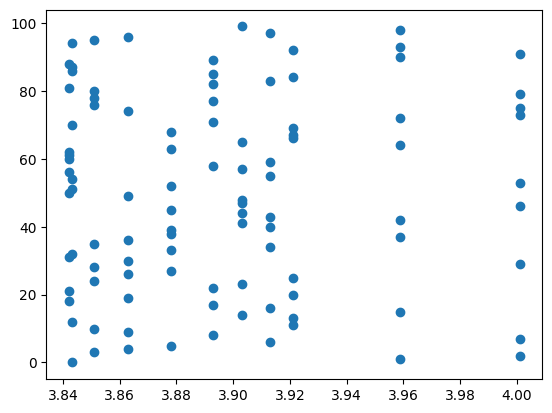

In [17]:
plt.scatter(x=means, y=np.arange(0, len(means)))

In [18]:
check_drift = {}
for col in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
            'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
            'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
            'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
            'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
            'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
            'feature32', 'feature33', 'feature34', 'feature35', 'feature36',
            'feature37', 'feature38', 'feature39', 'feature40', 'feature41']:
    if col not in ["feature2",
                   "feature3",
                   "feature4"]:
        print(col)
        mean_ = []
        std_ = []
        max_ = []
        min_ = []
        n_maxs = []
        n_mins = []
        train_max = train_df[col].max()
        train_min = train_df[col].min()
        for df in dfs:
            mean_.append(df[col].mean())
            std_.append(df[col].std())
            max_.append(df[col].max())
            min_.append(df[col].min())
            n_maxs.append(df[df[col]>train_max].shape[0])
            n_mins.append(df[df[col]<train_min].shape[0])
        check_drift[col] = pd.DataFrame({'mean_':mean_, 'std_':std_, 'max_': max_, 'min_':min_, 'n_max':n_maxs, 'n_min':n_mins})

feature1
feature5
feature6
feature7
feature8
feature9
feature10
feature11
feature12
feature13
feature14
feature15
feature16
feature17
feature18
feature19
feature20
feature21
feature22
feature23
feature24
feature25
feature26
feature27
feature28
feature29
feature30
feature31
feature32
feature33
feature34
feature35
feature36
feature37
feature38
feature39
feature40
feature41


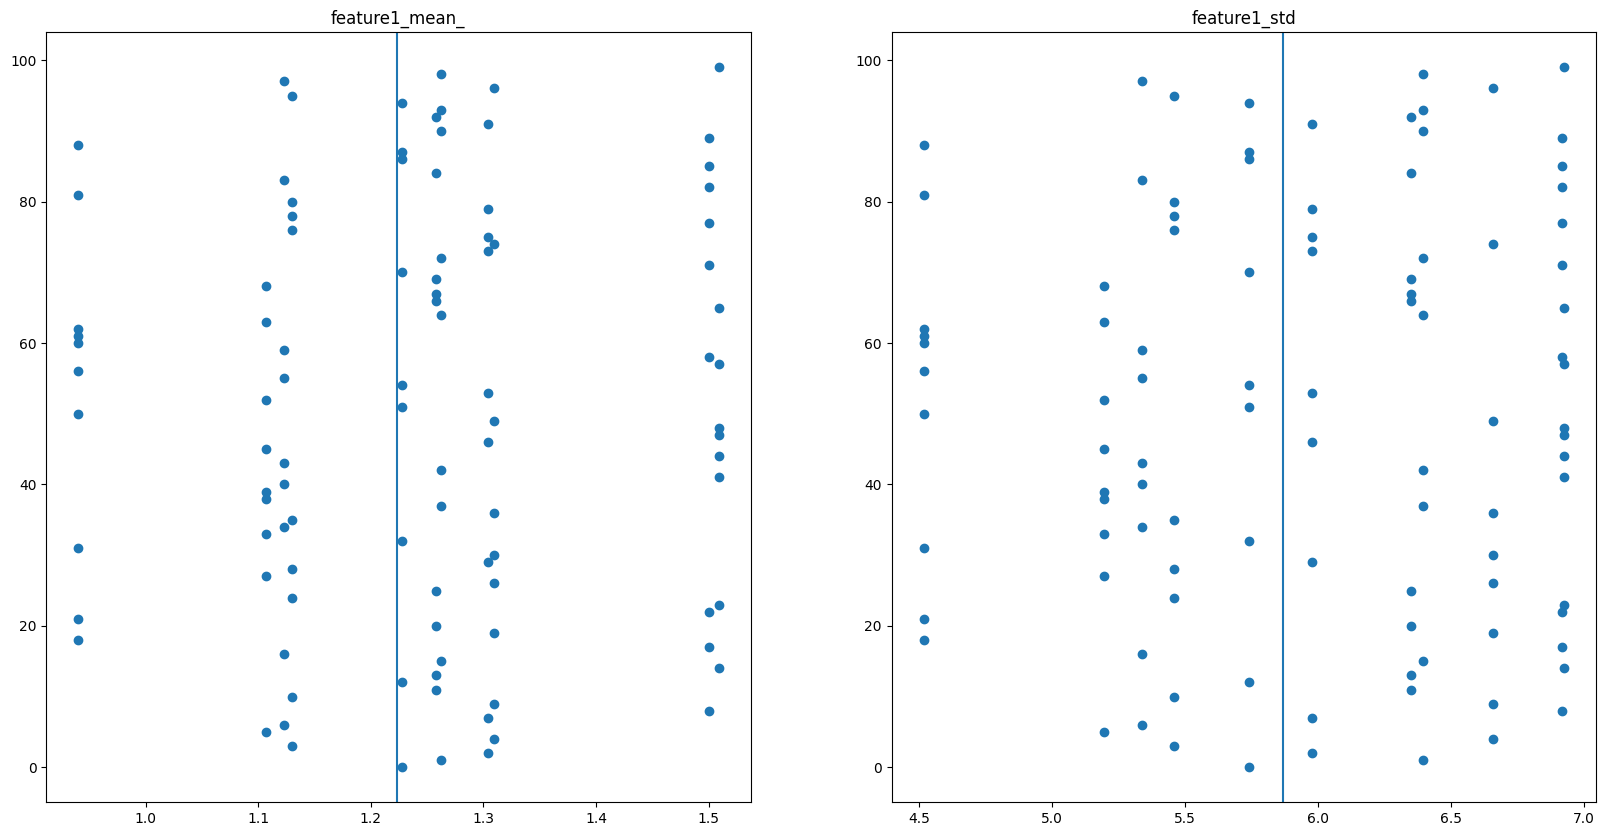

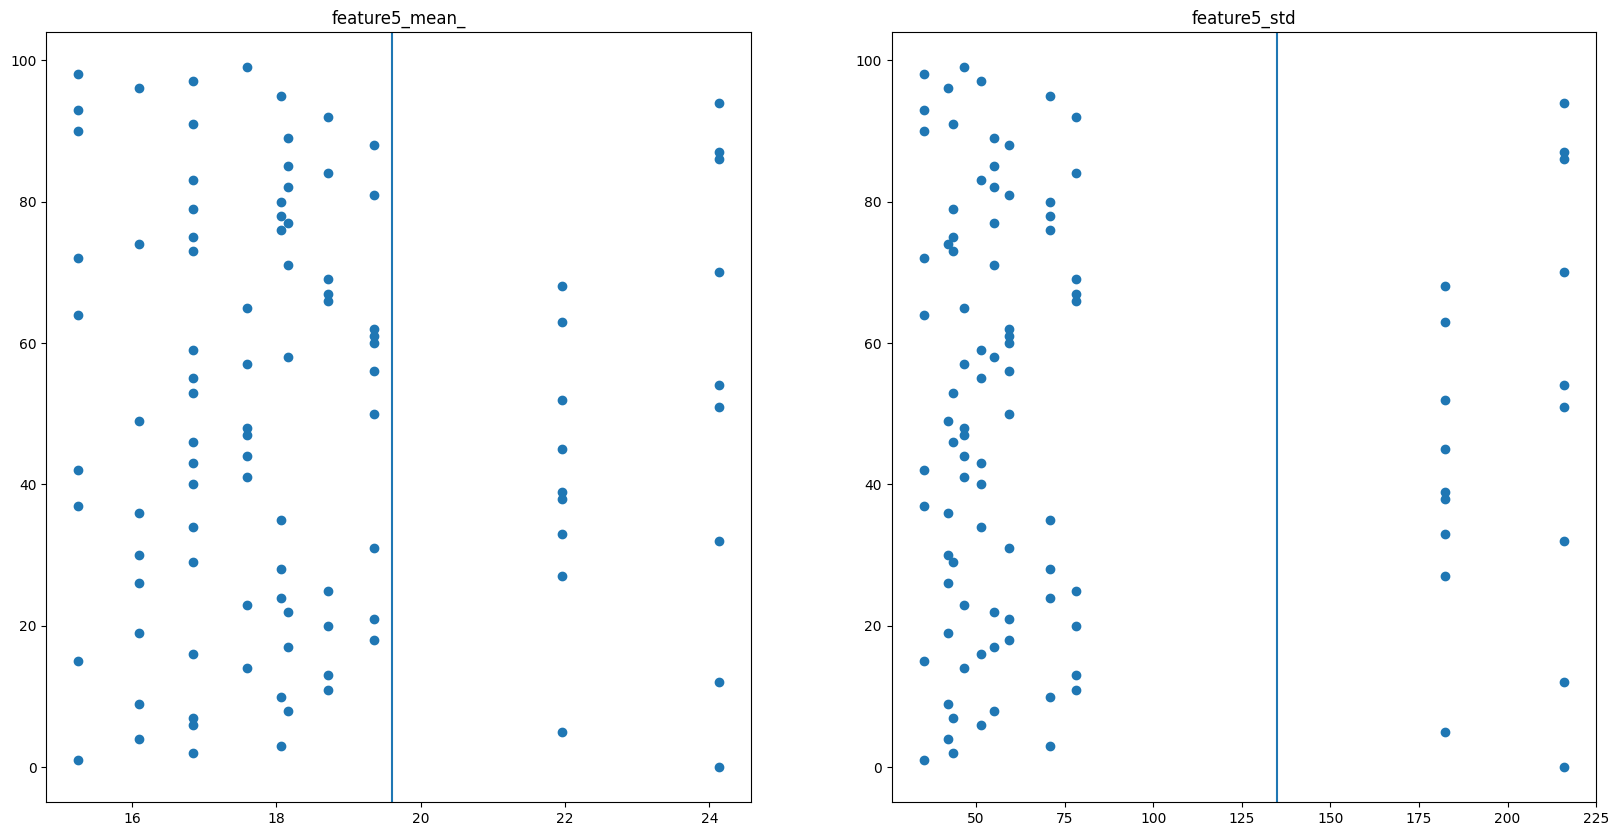

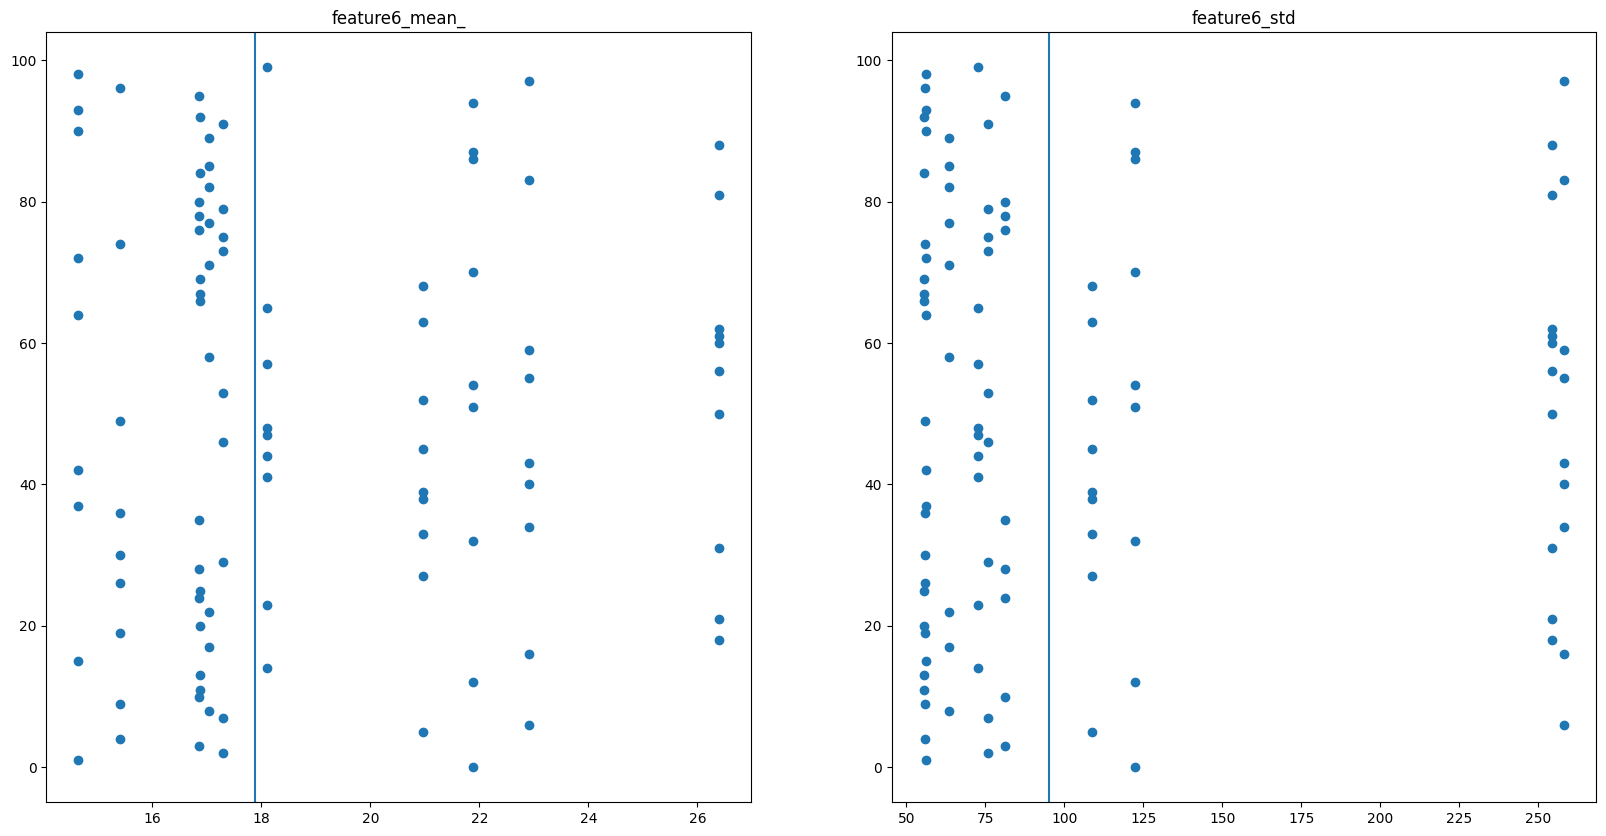

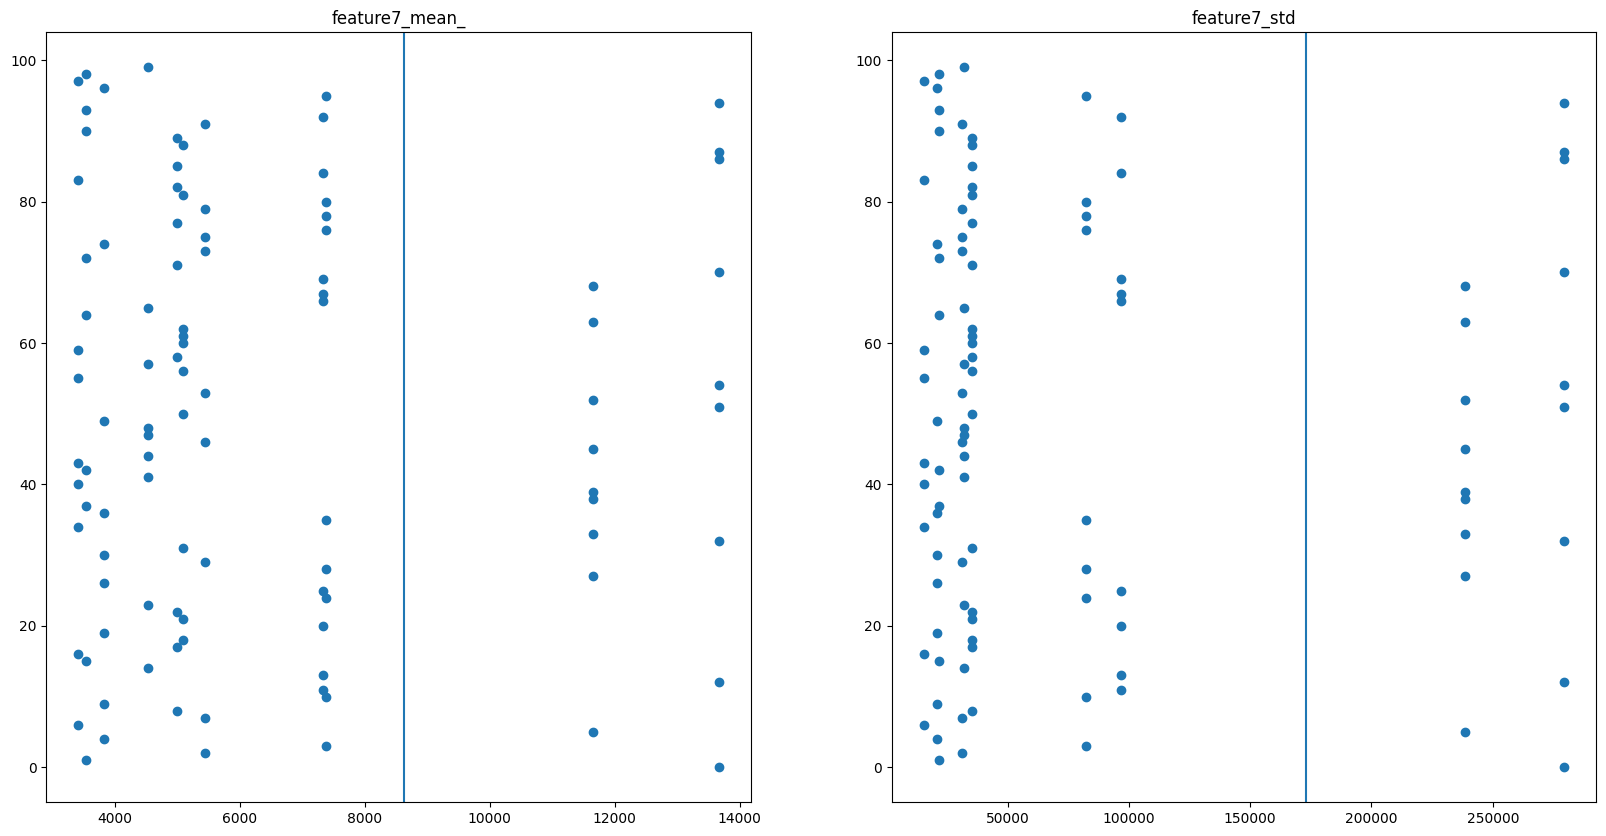

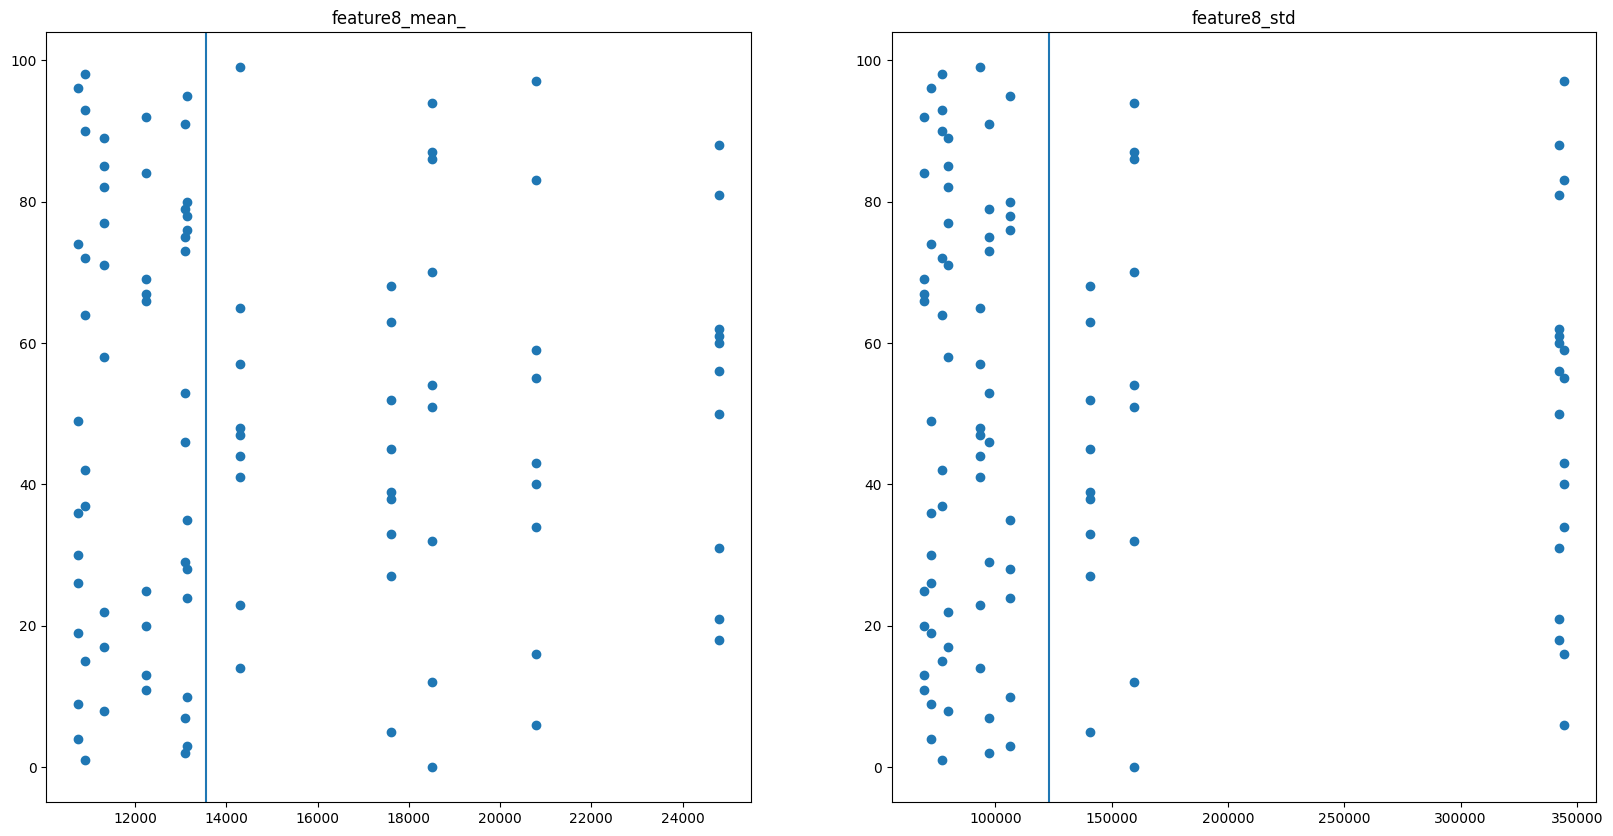

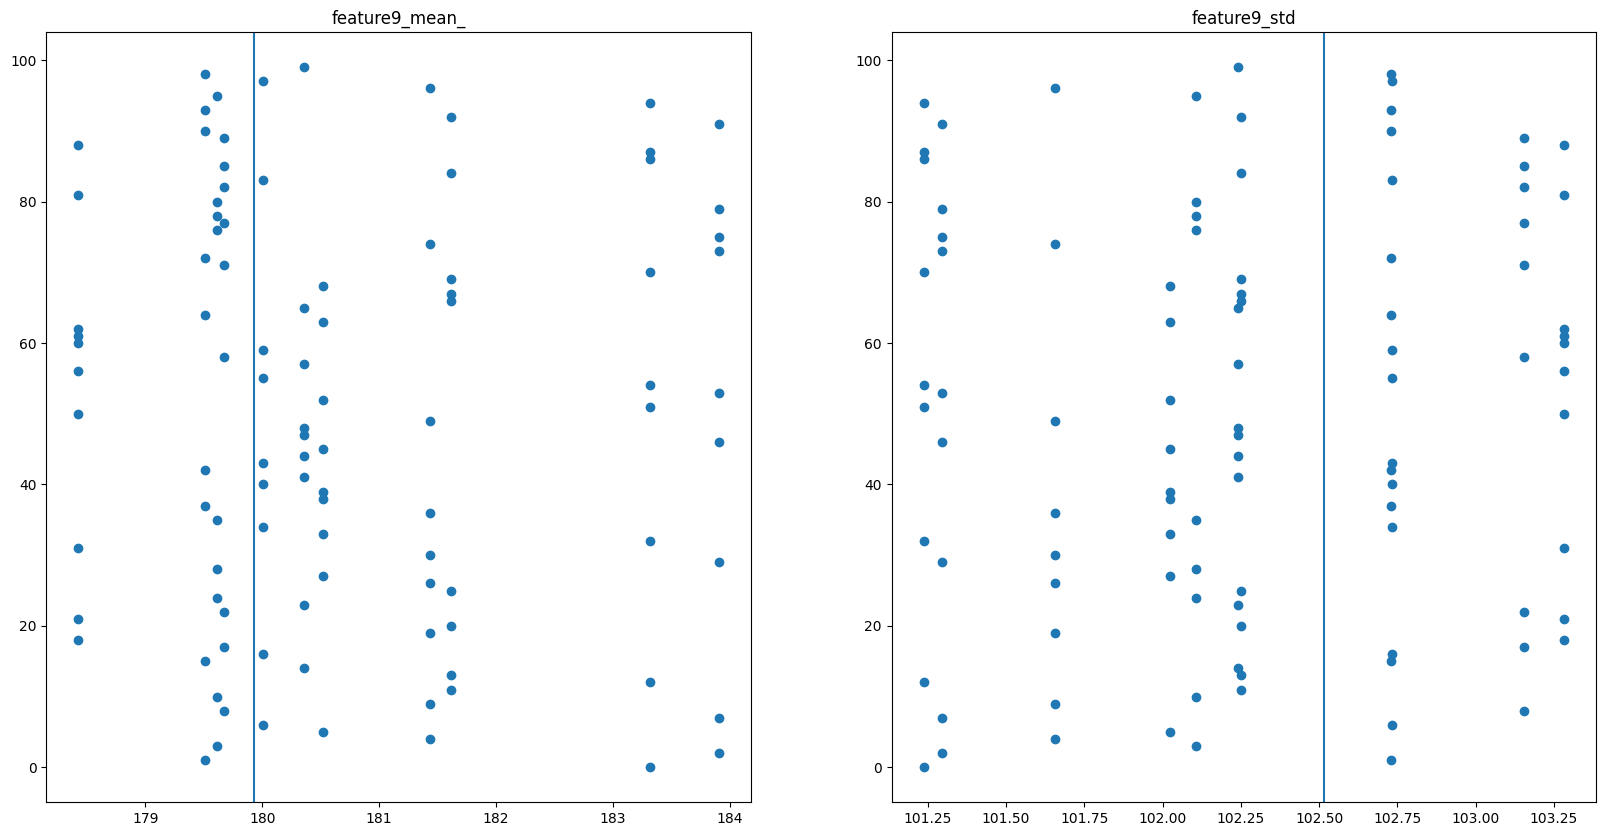

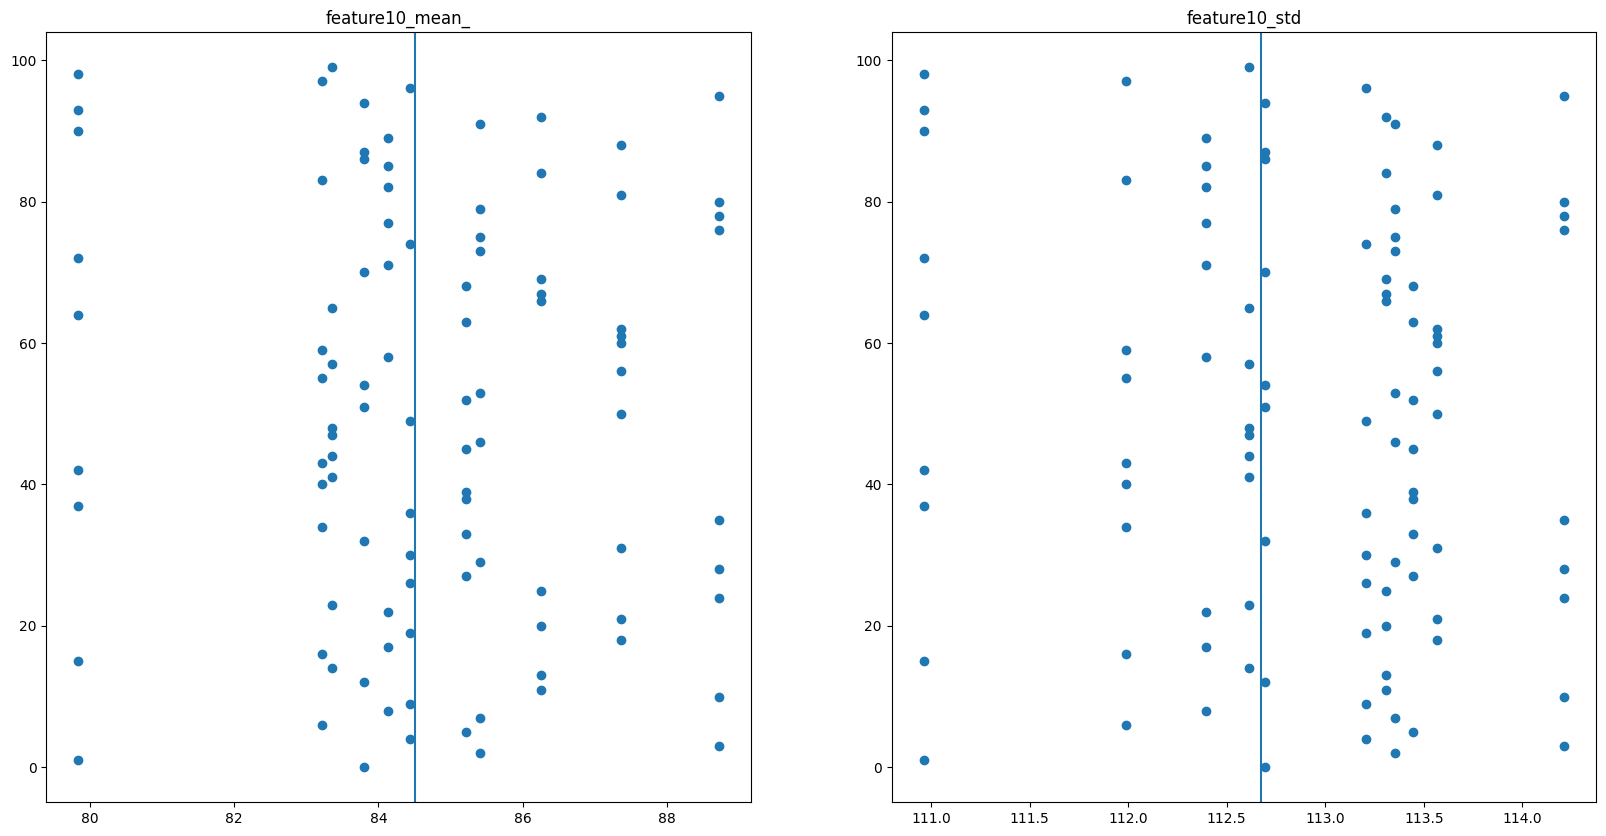

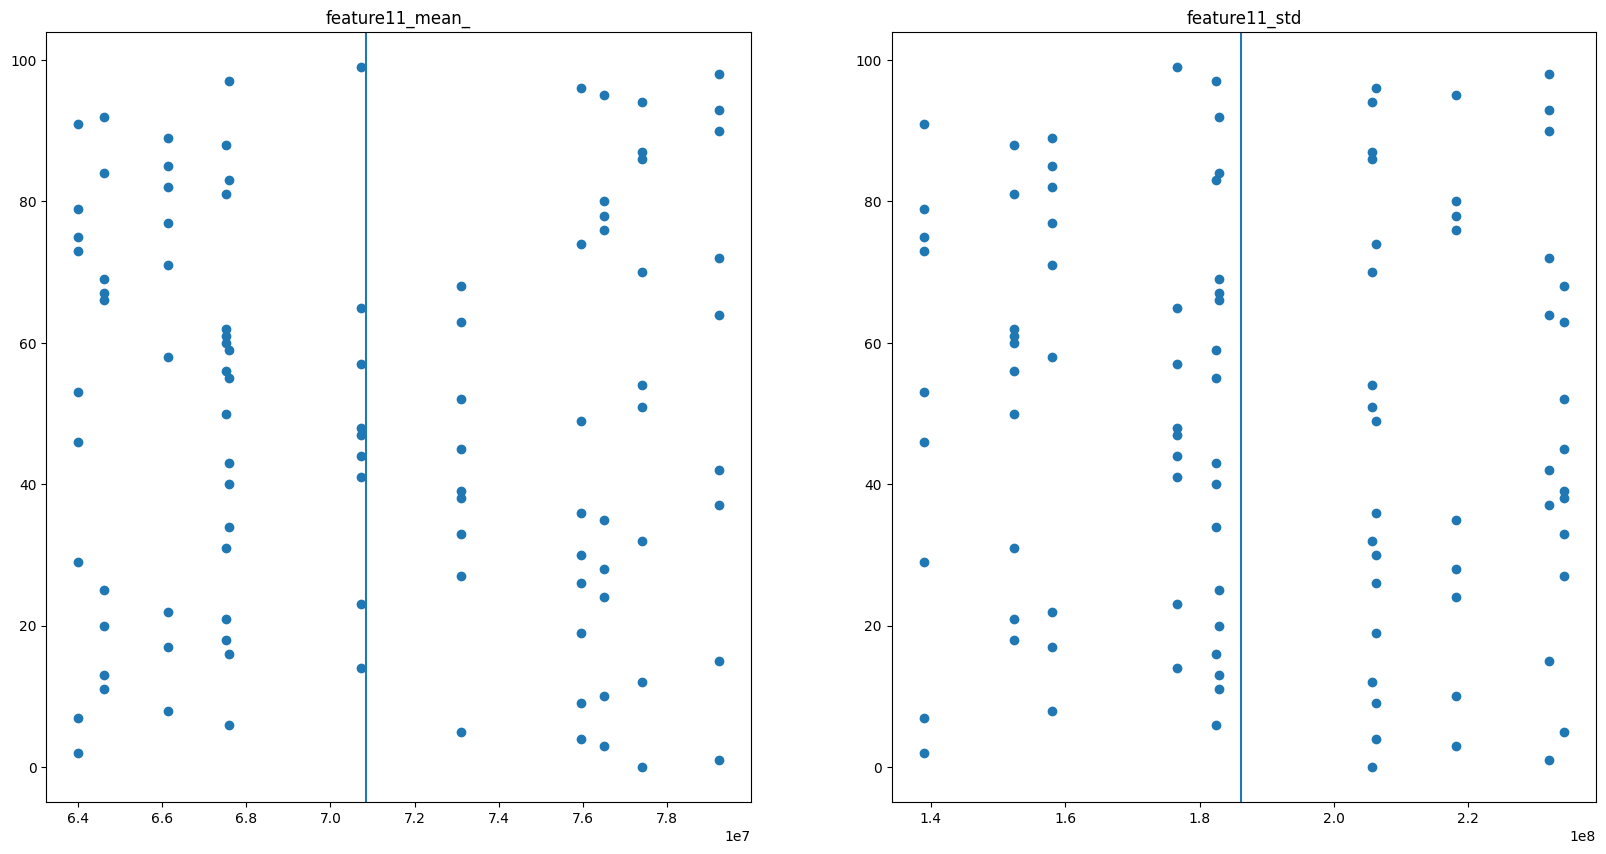

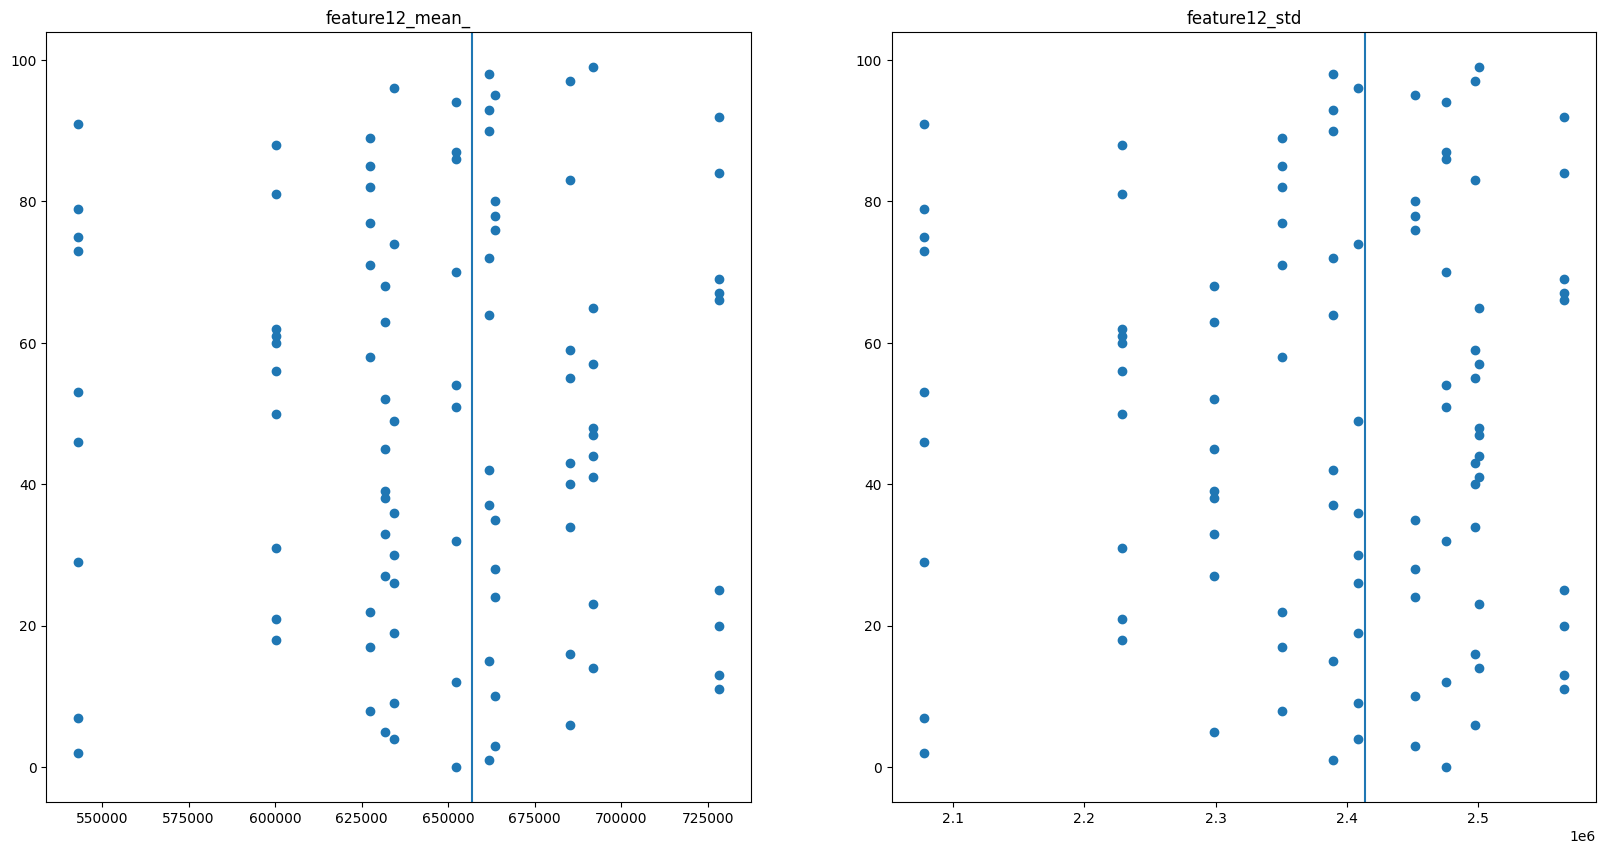

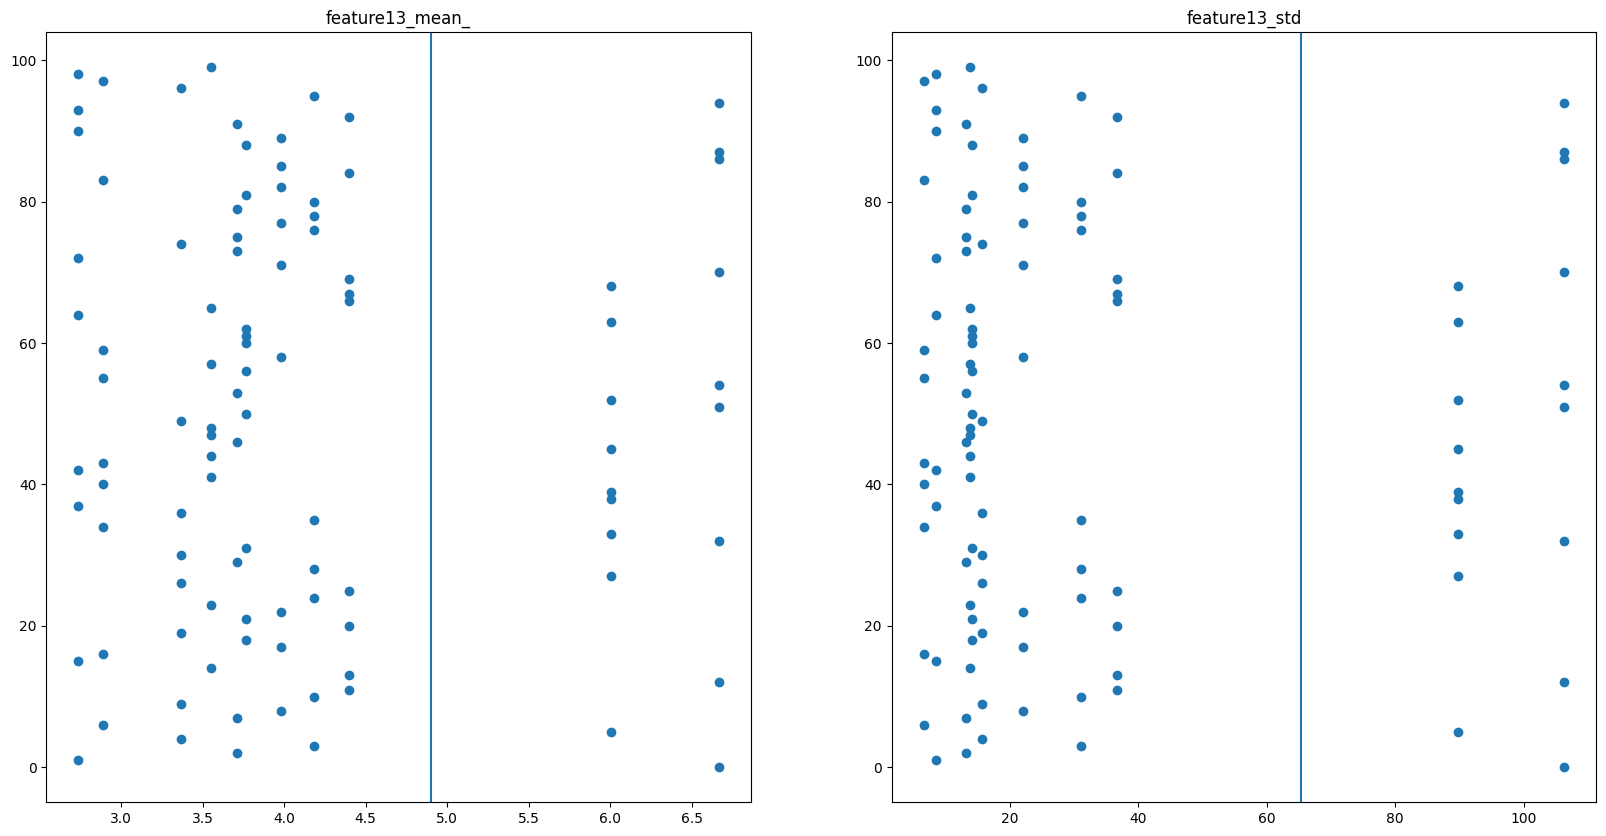

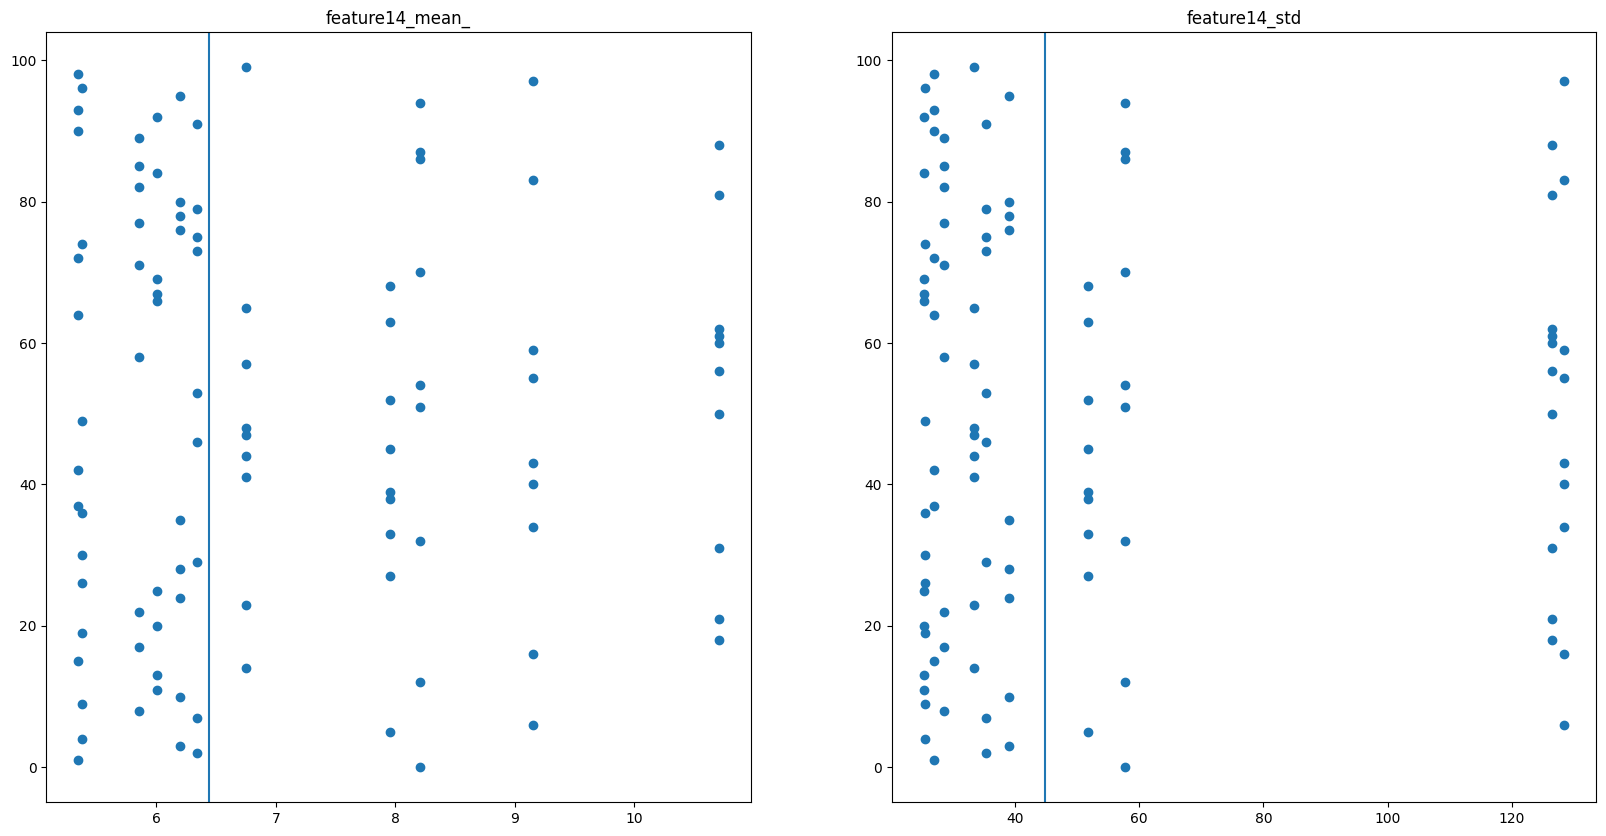

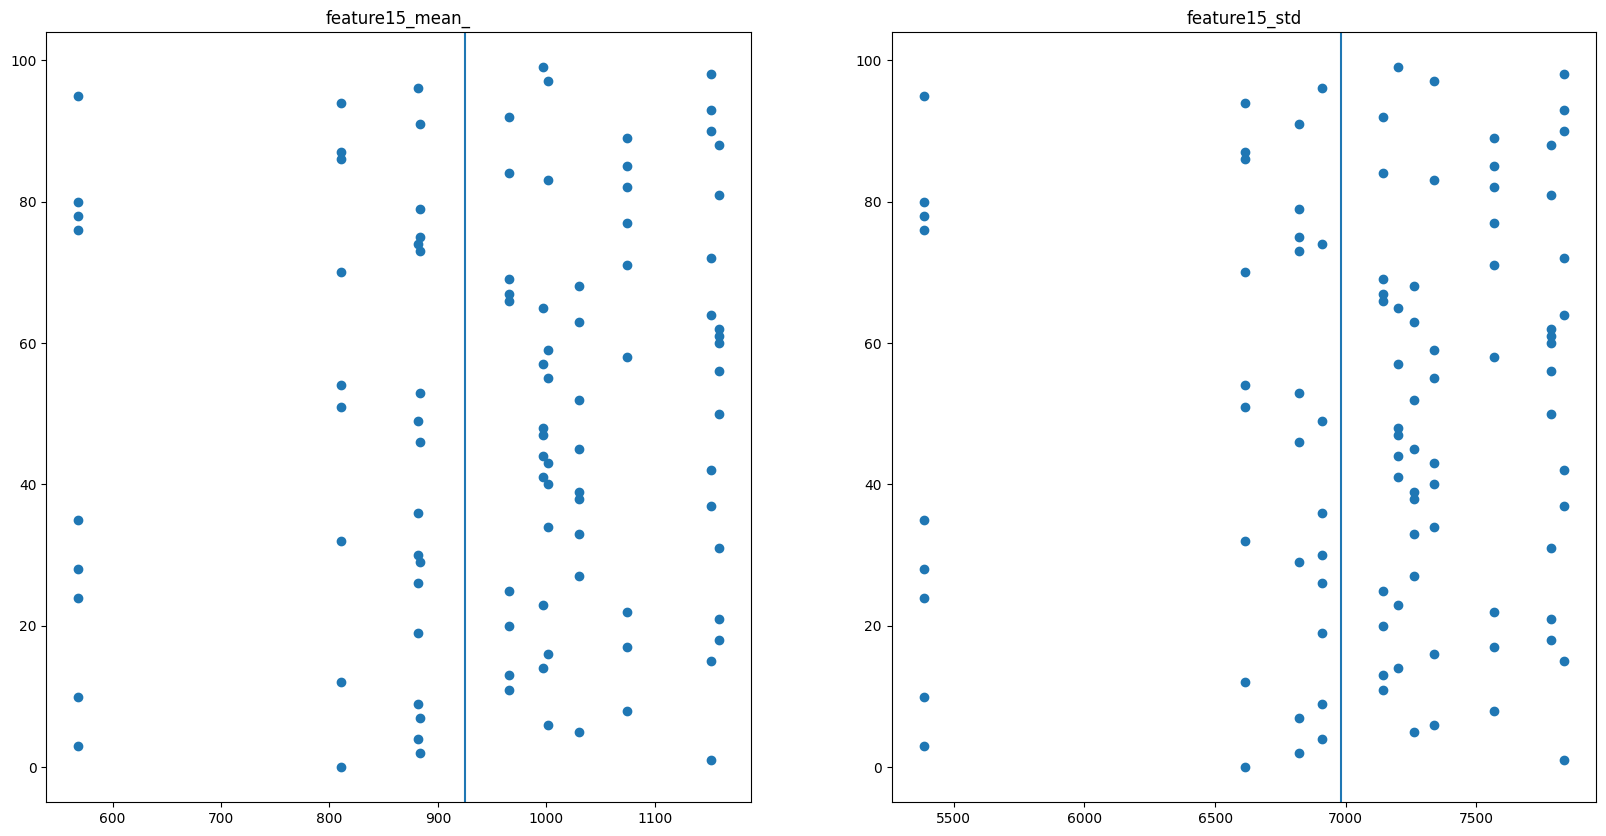

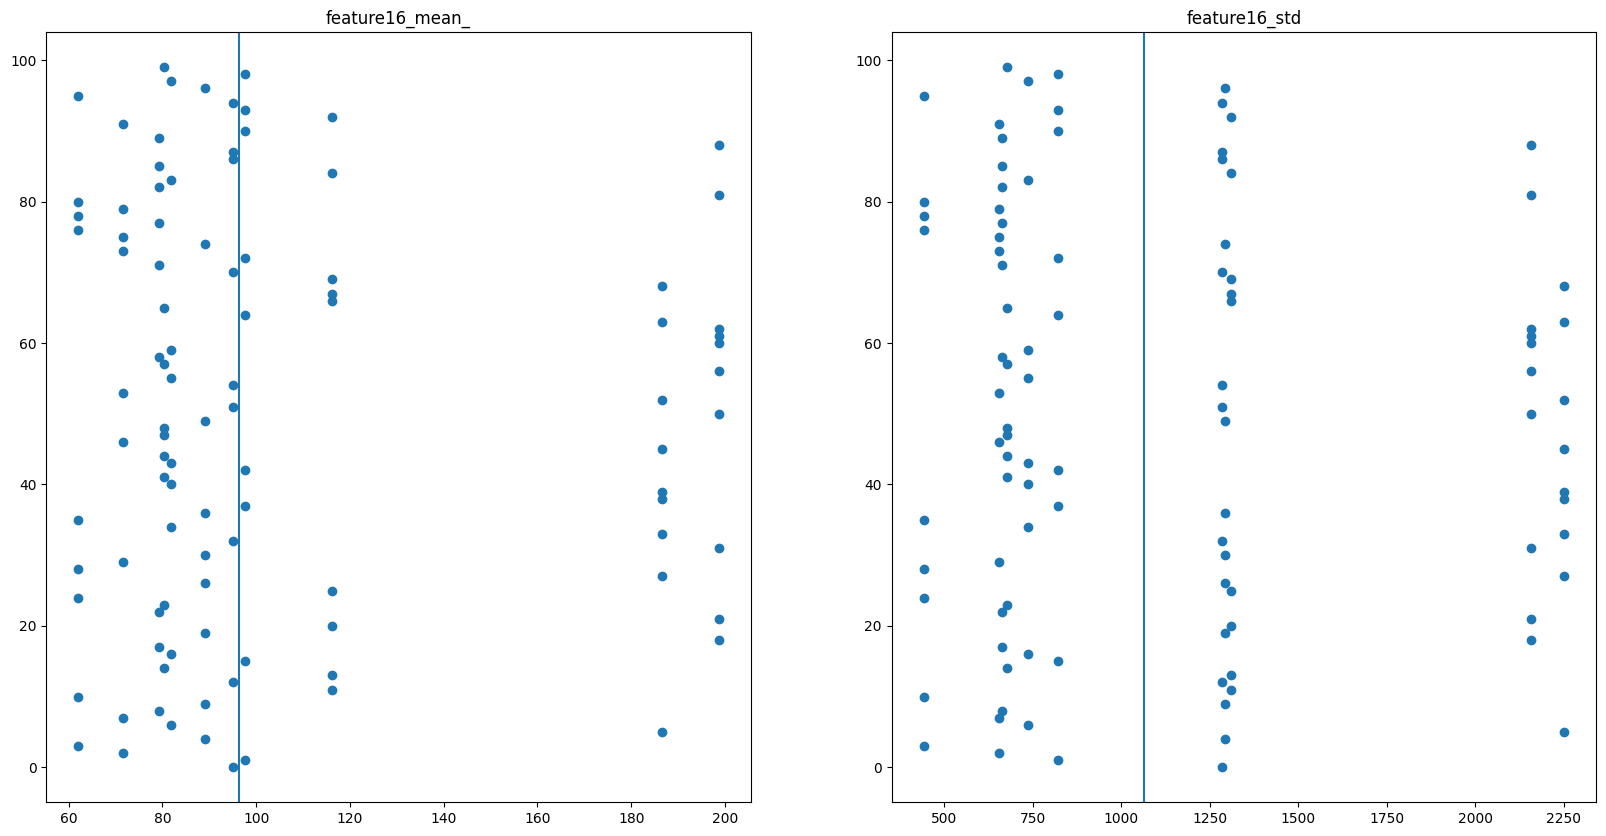

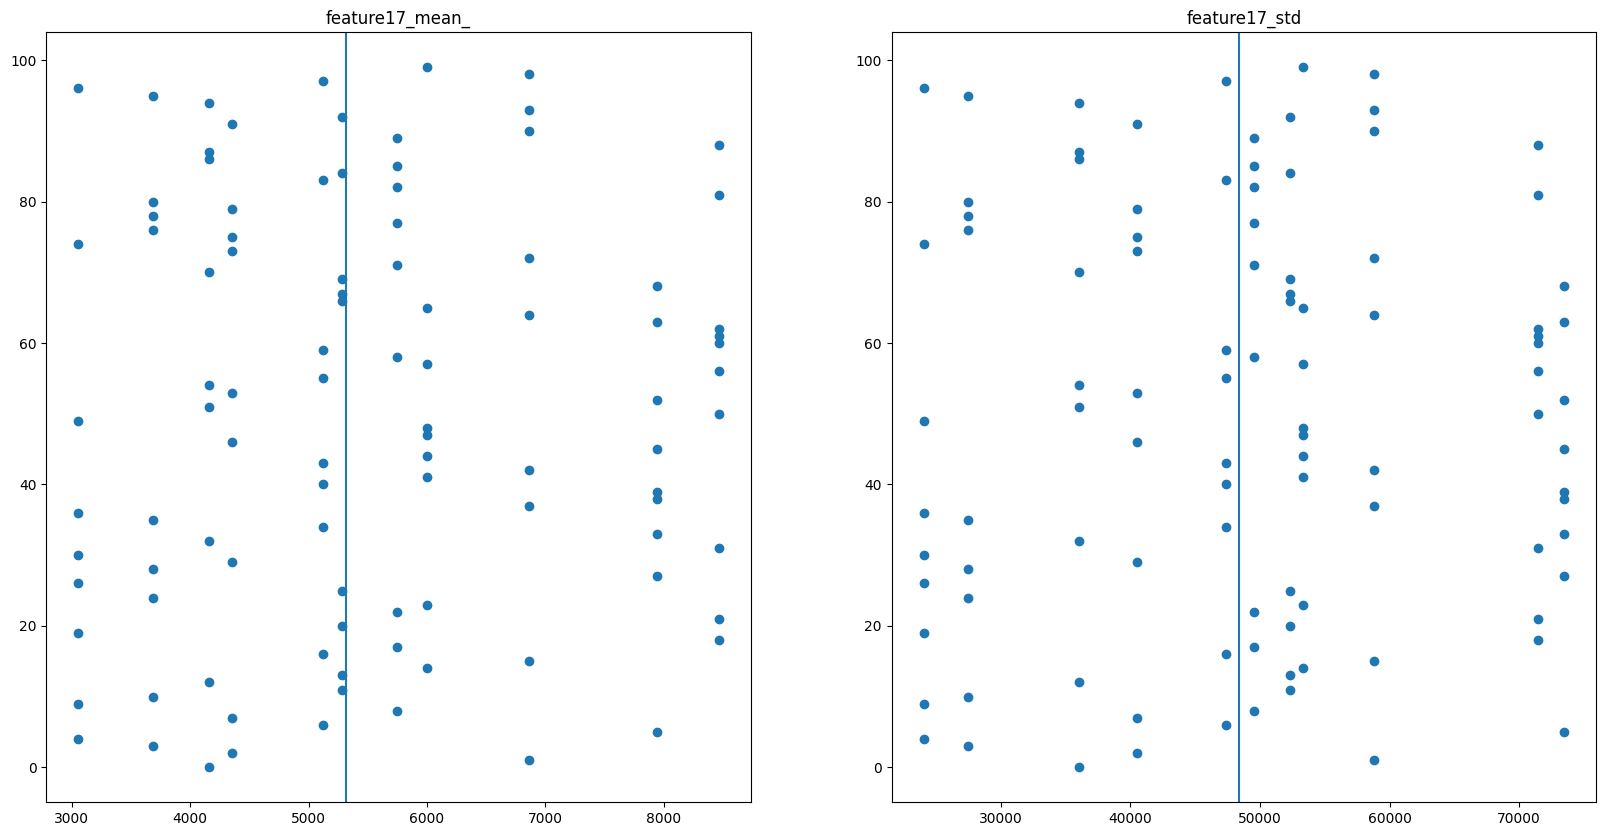

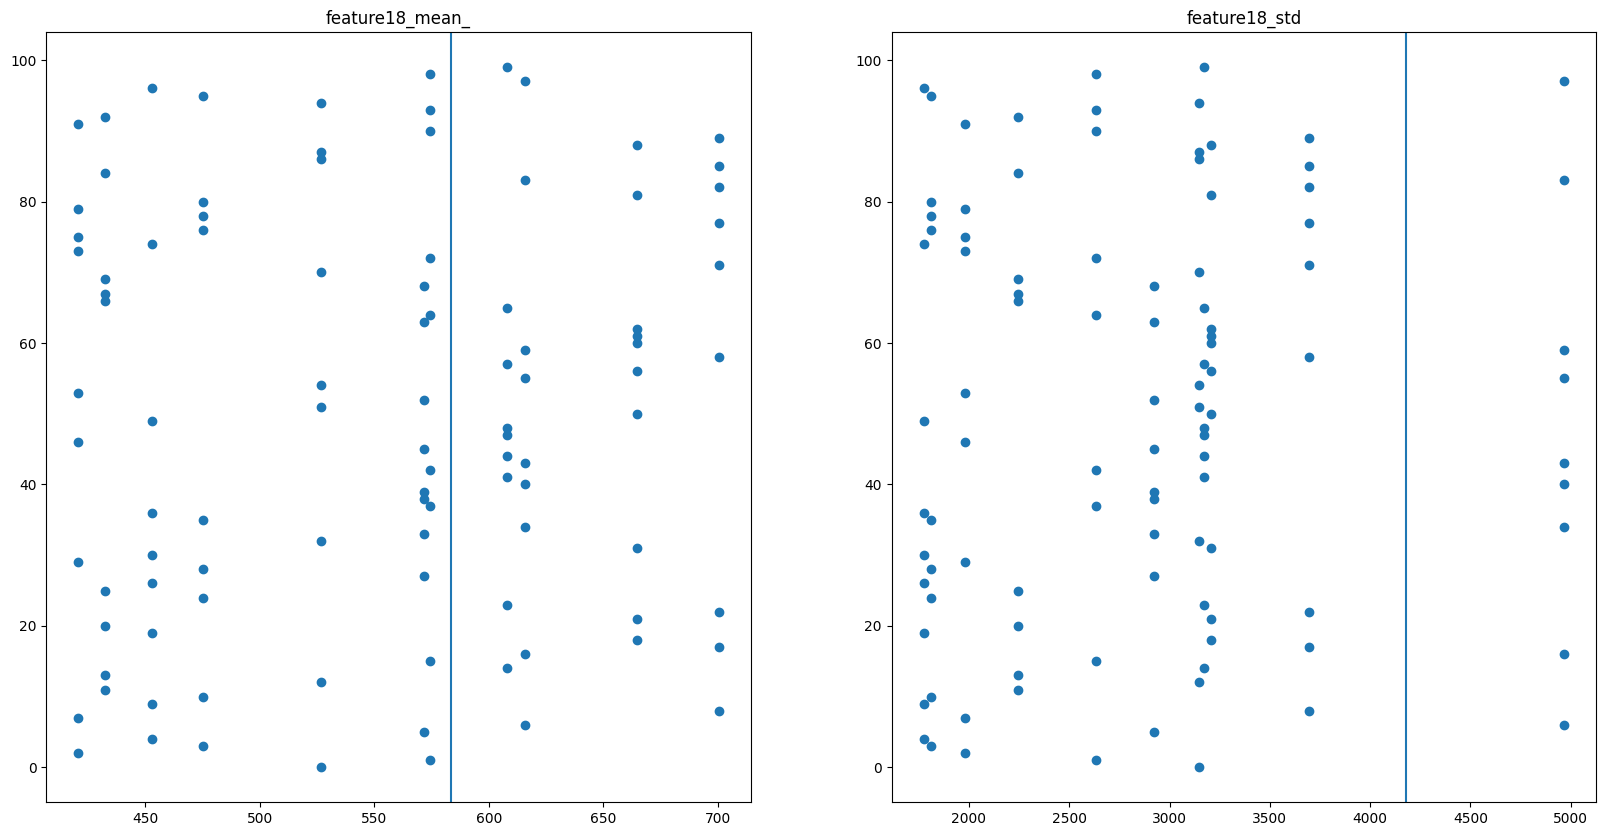

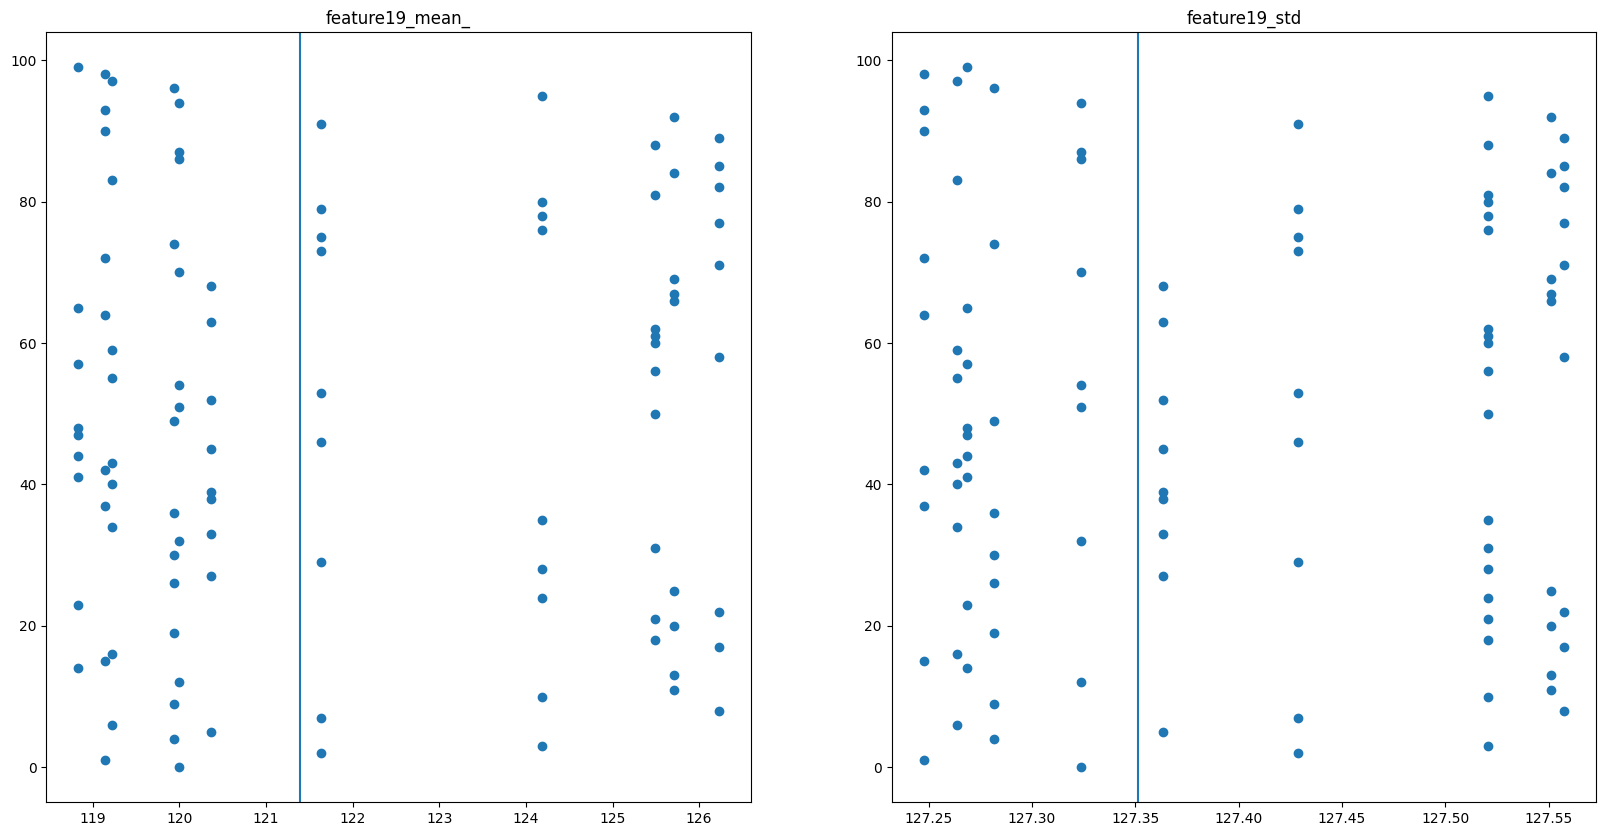

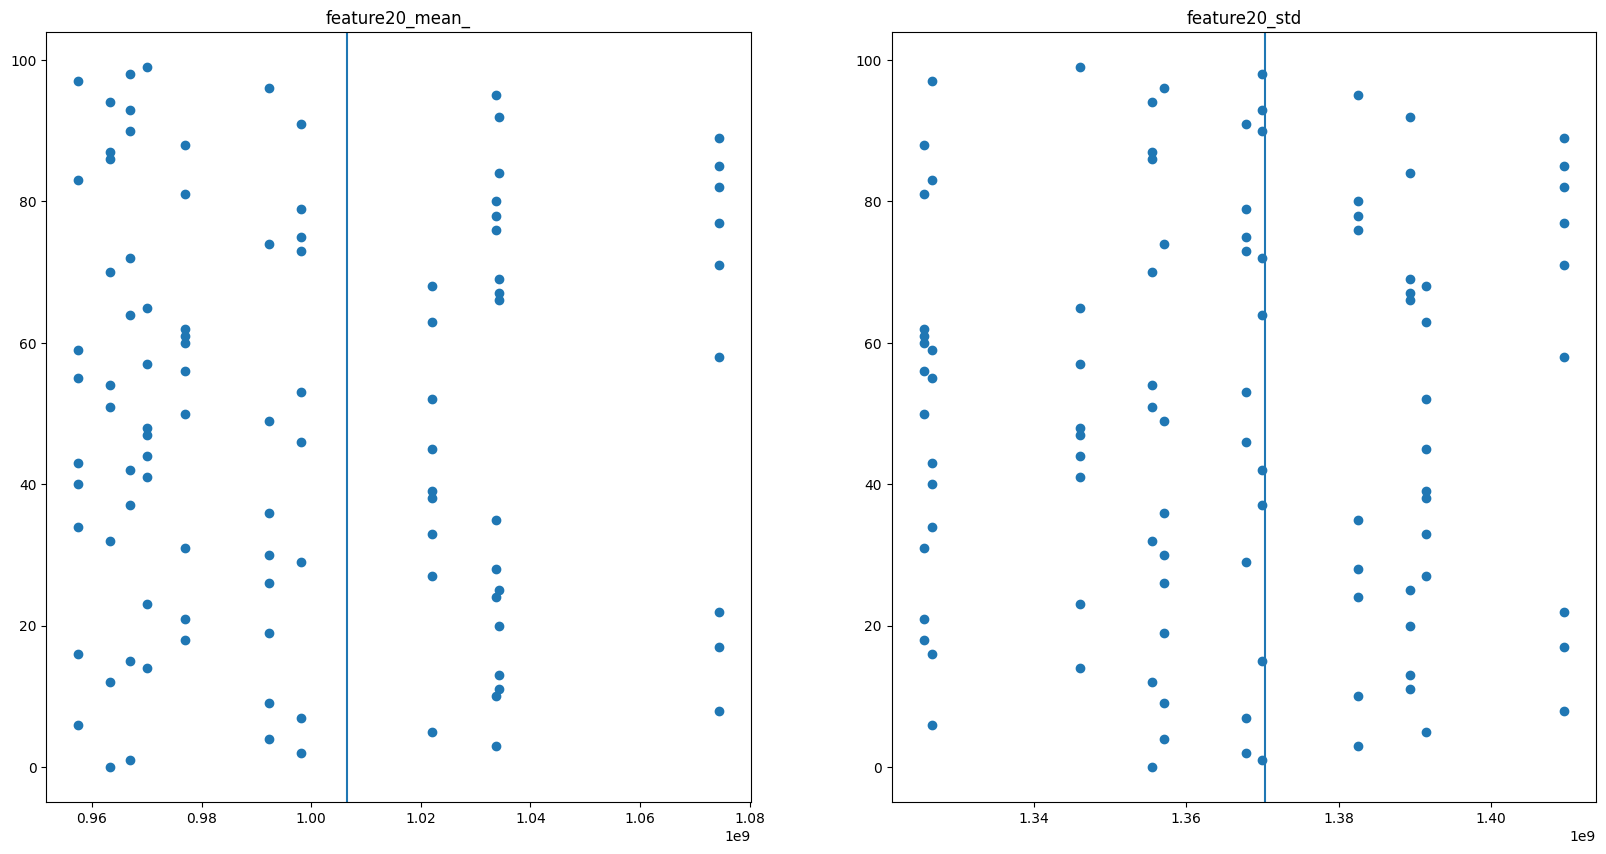

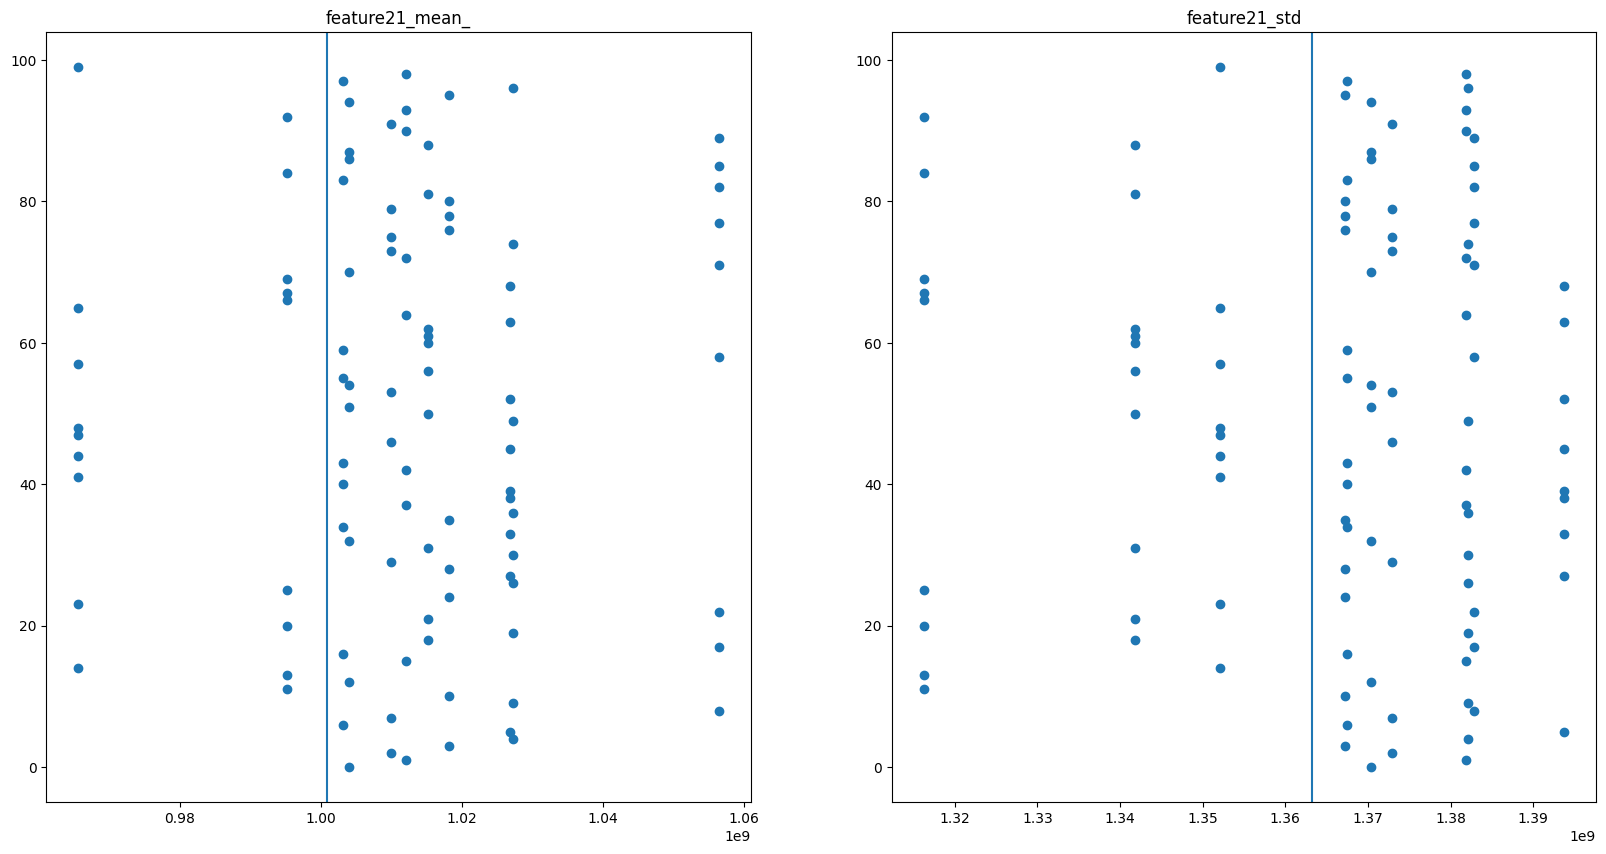

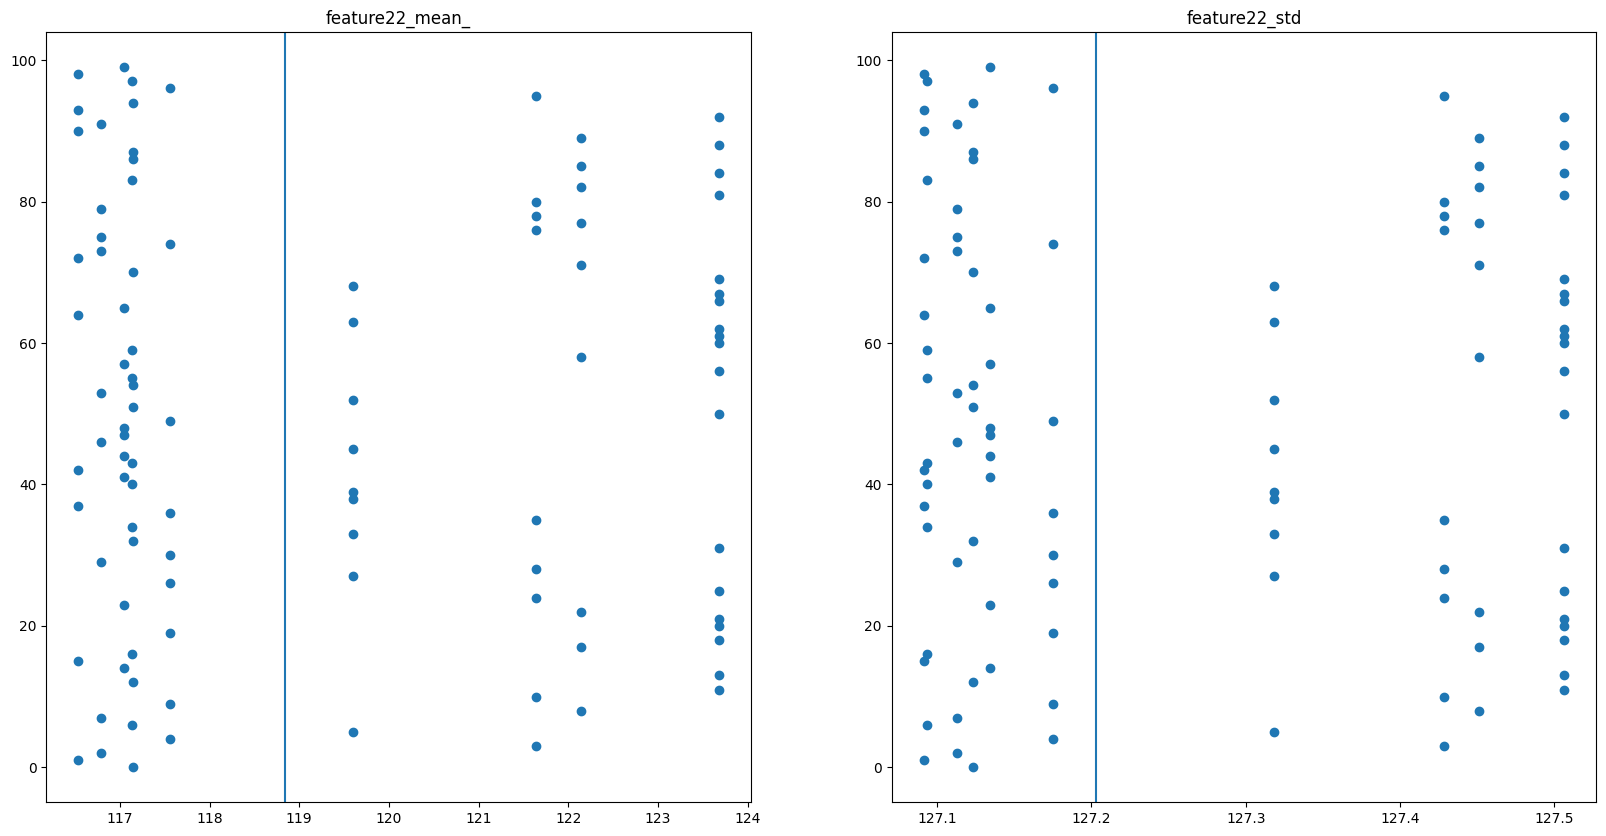

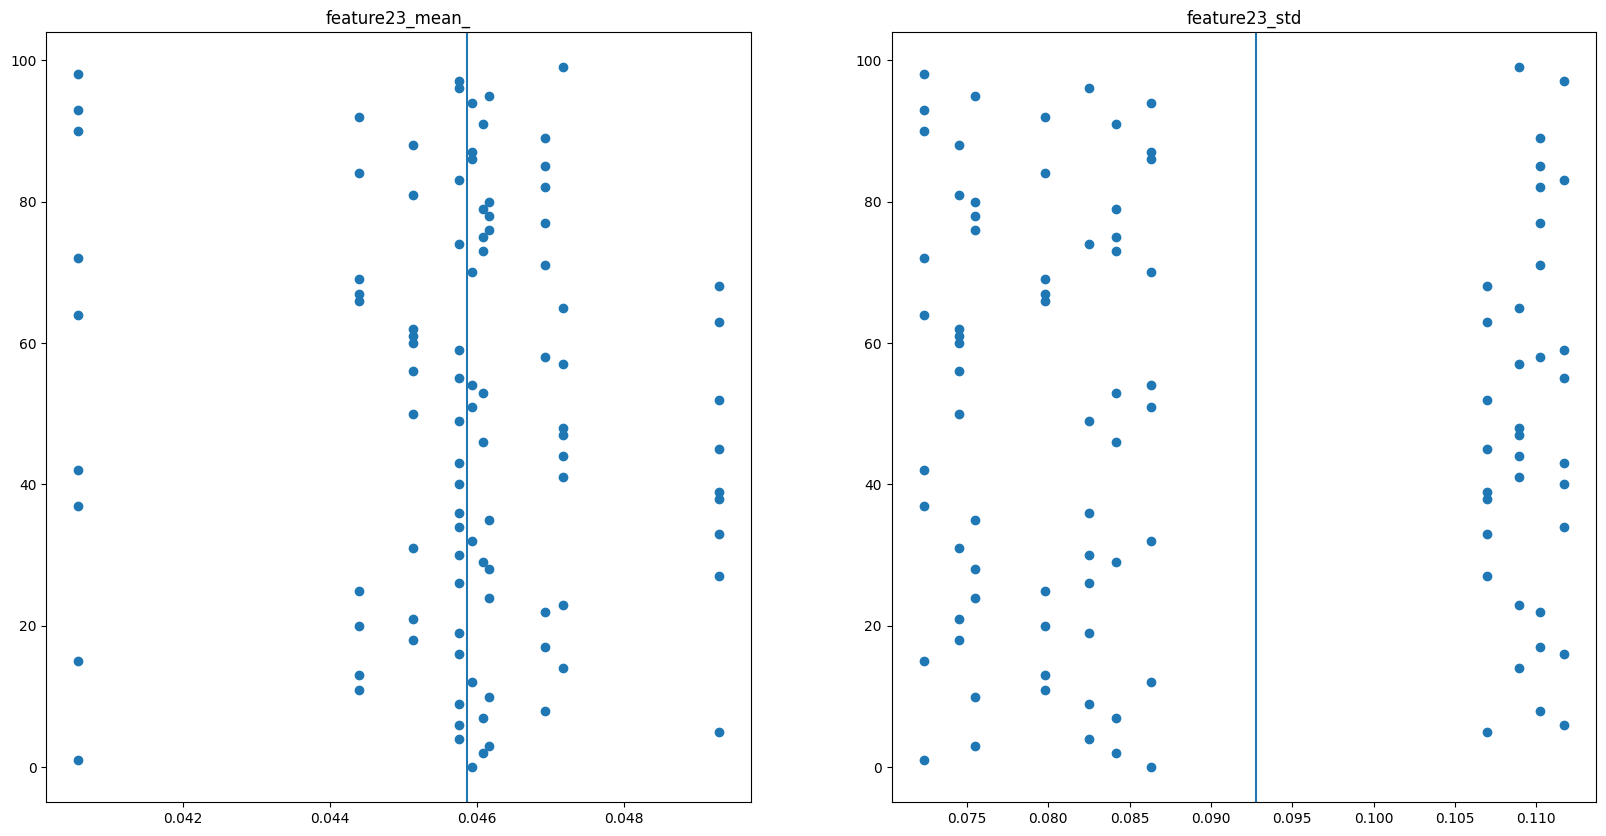

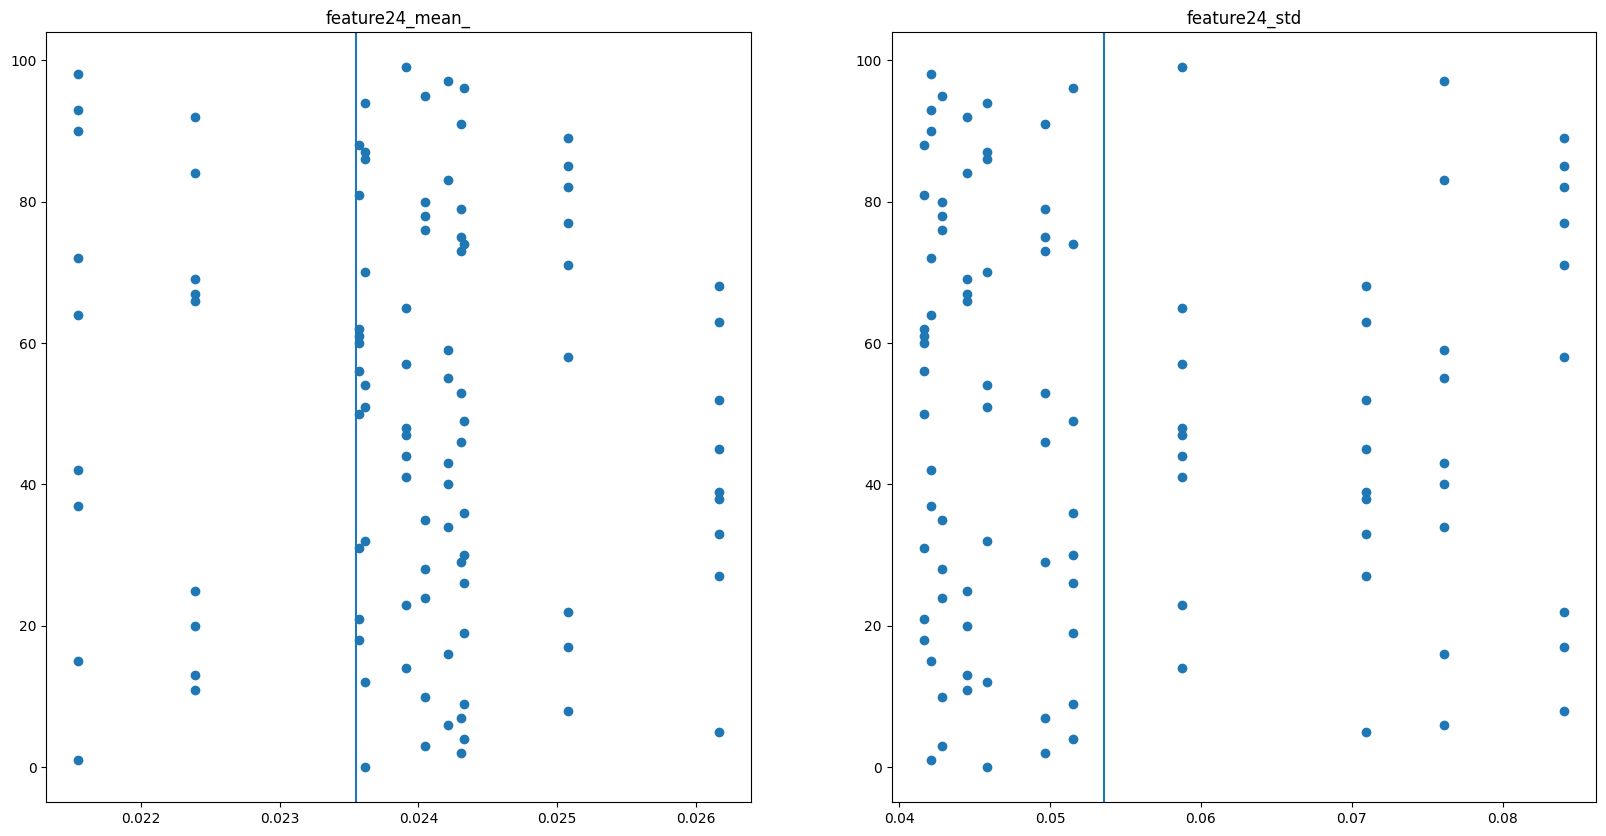

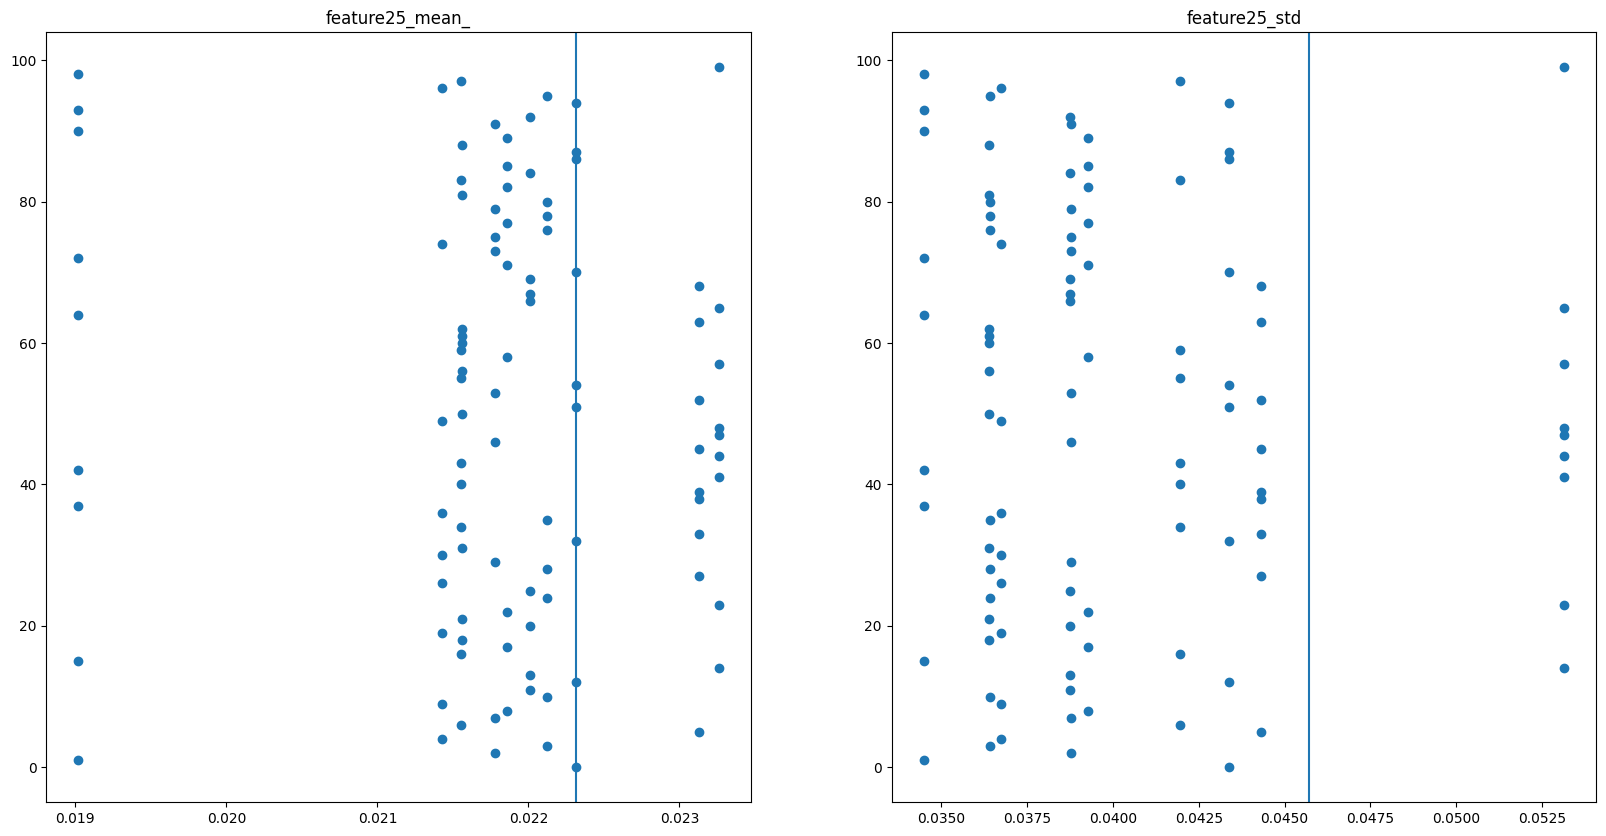

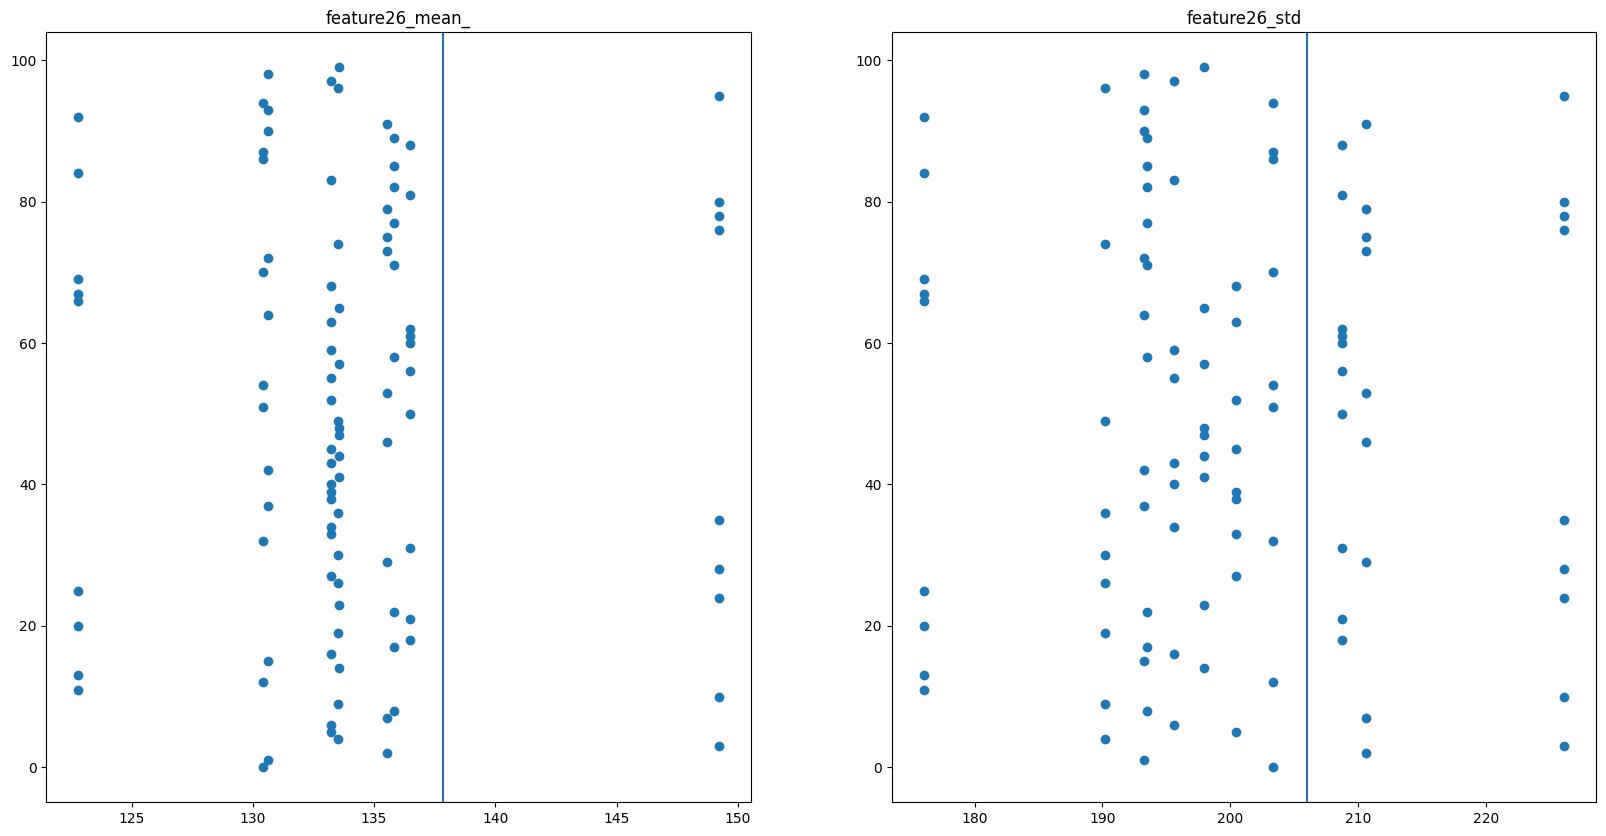

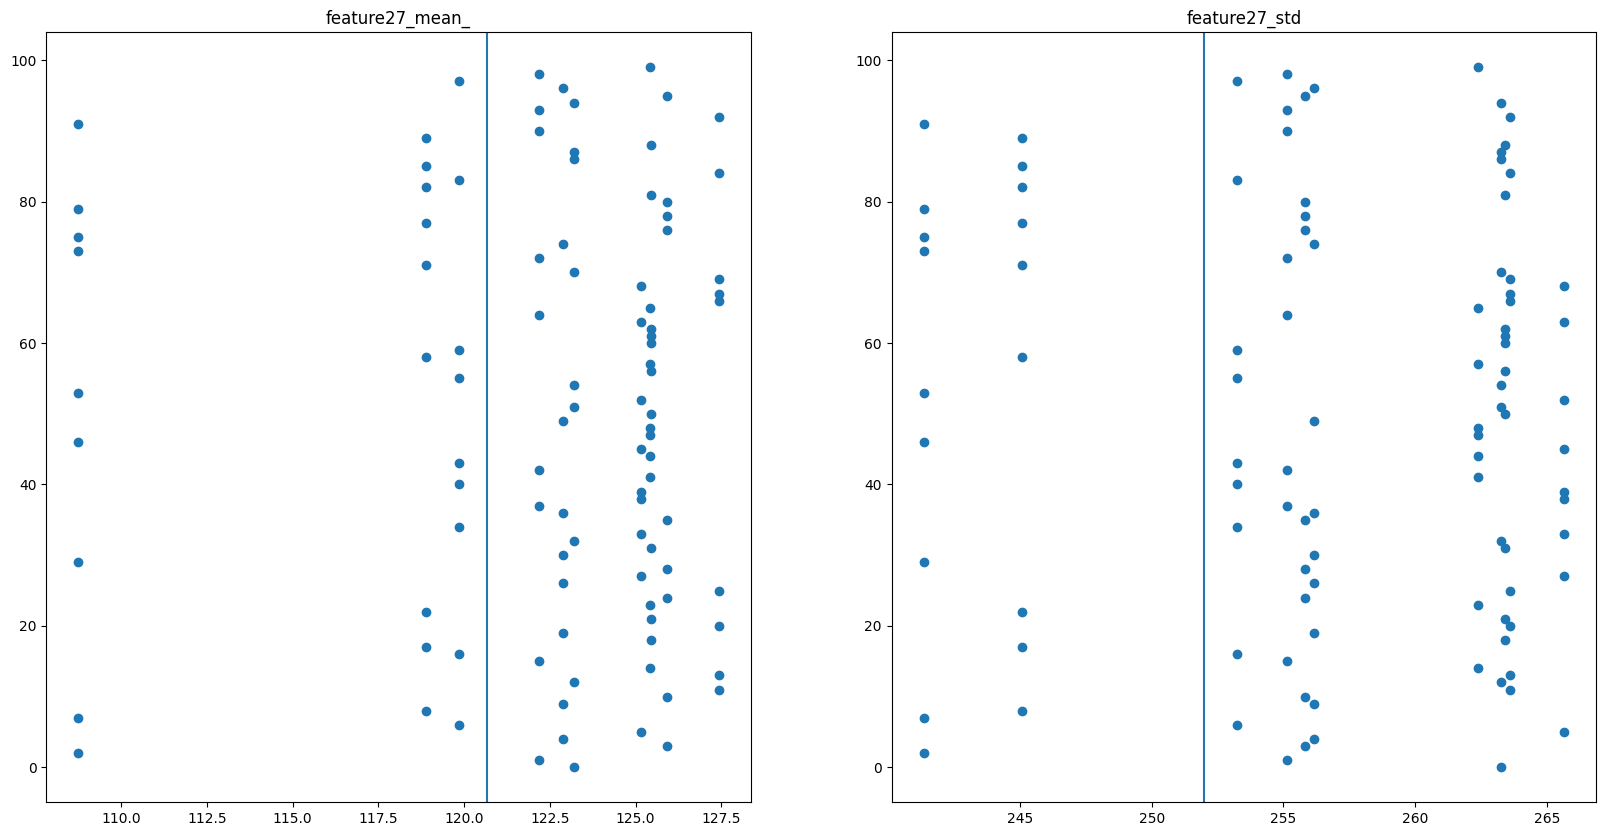

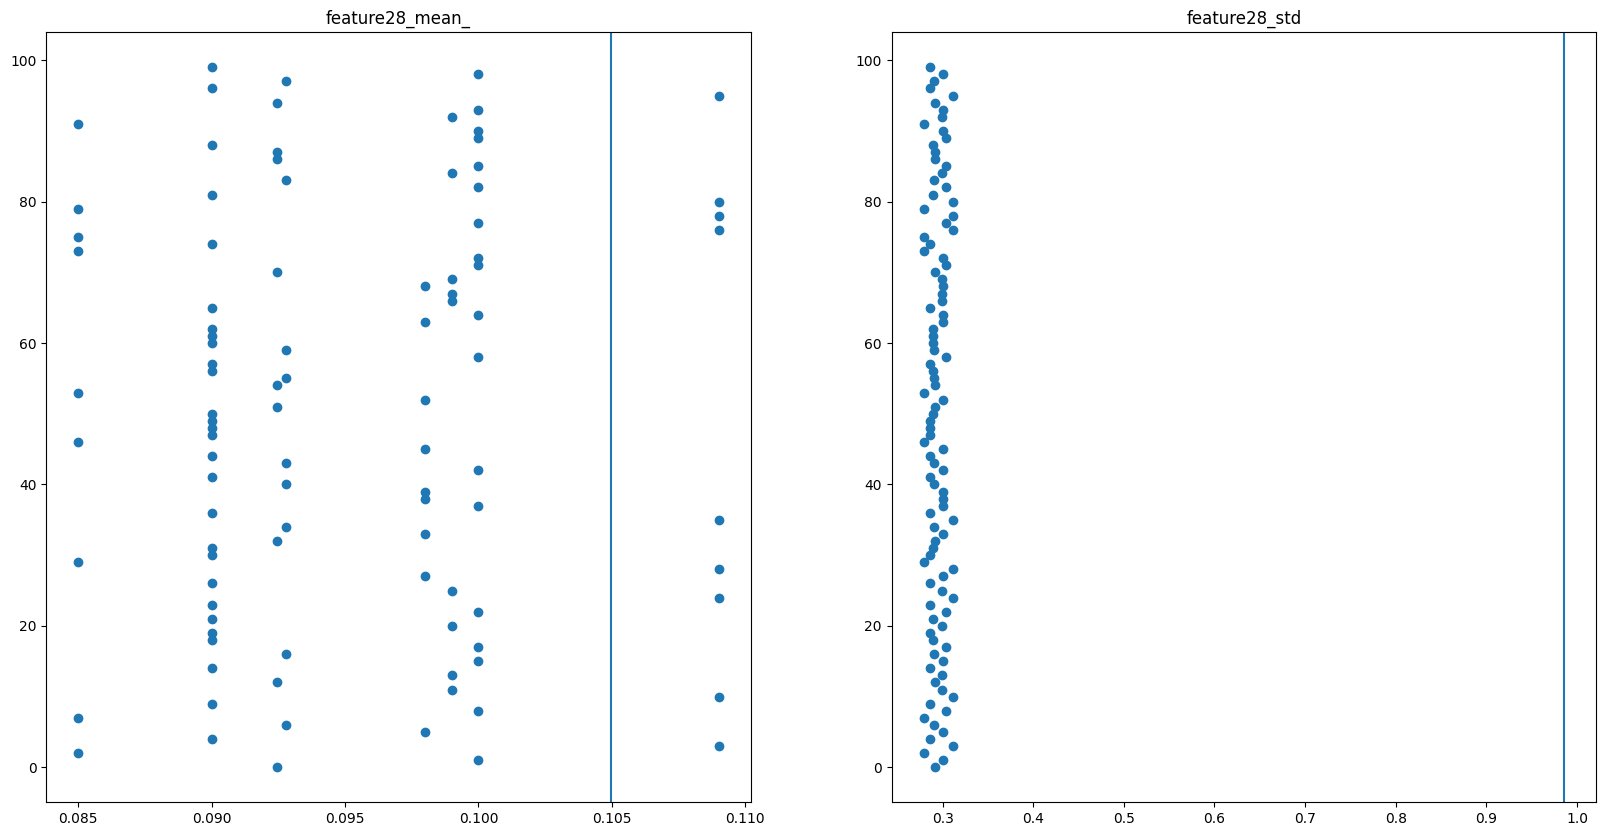

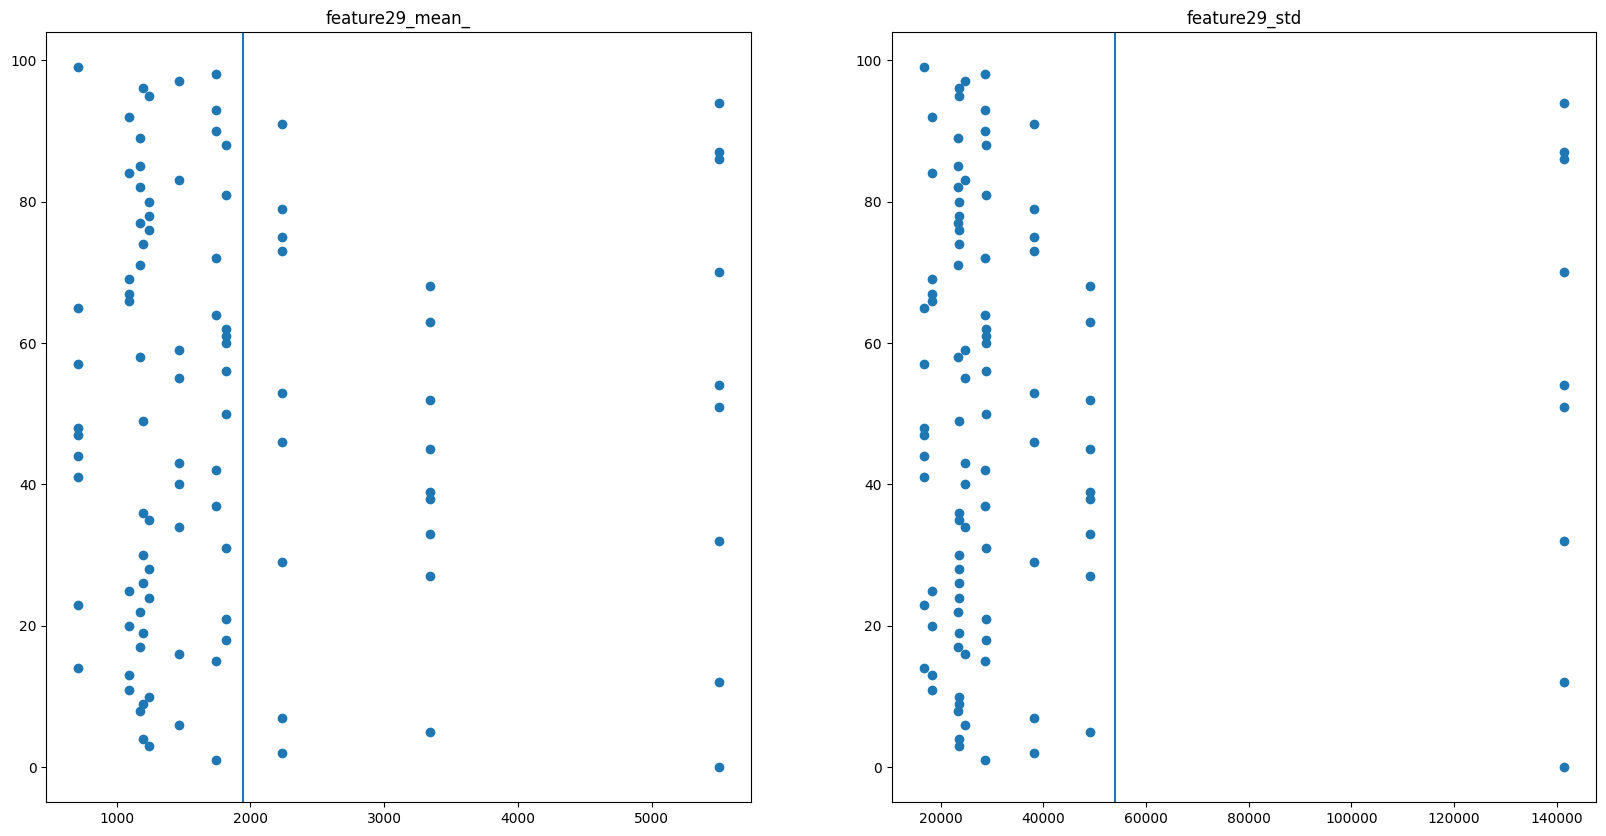

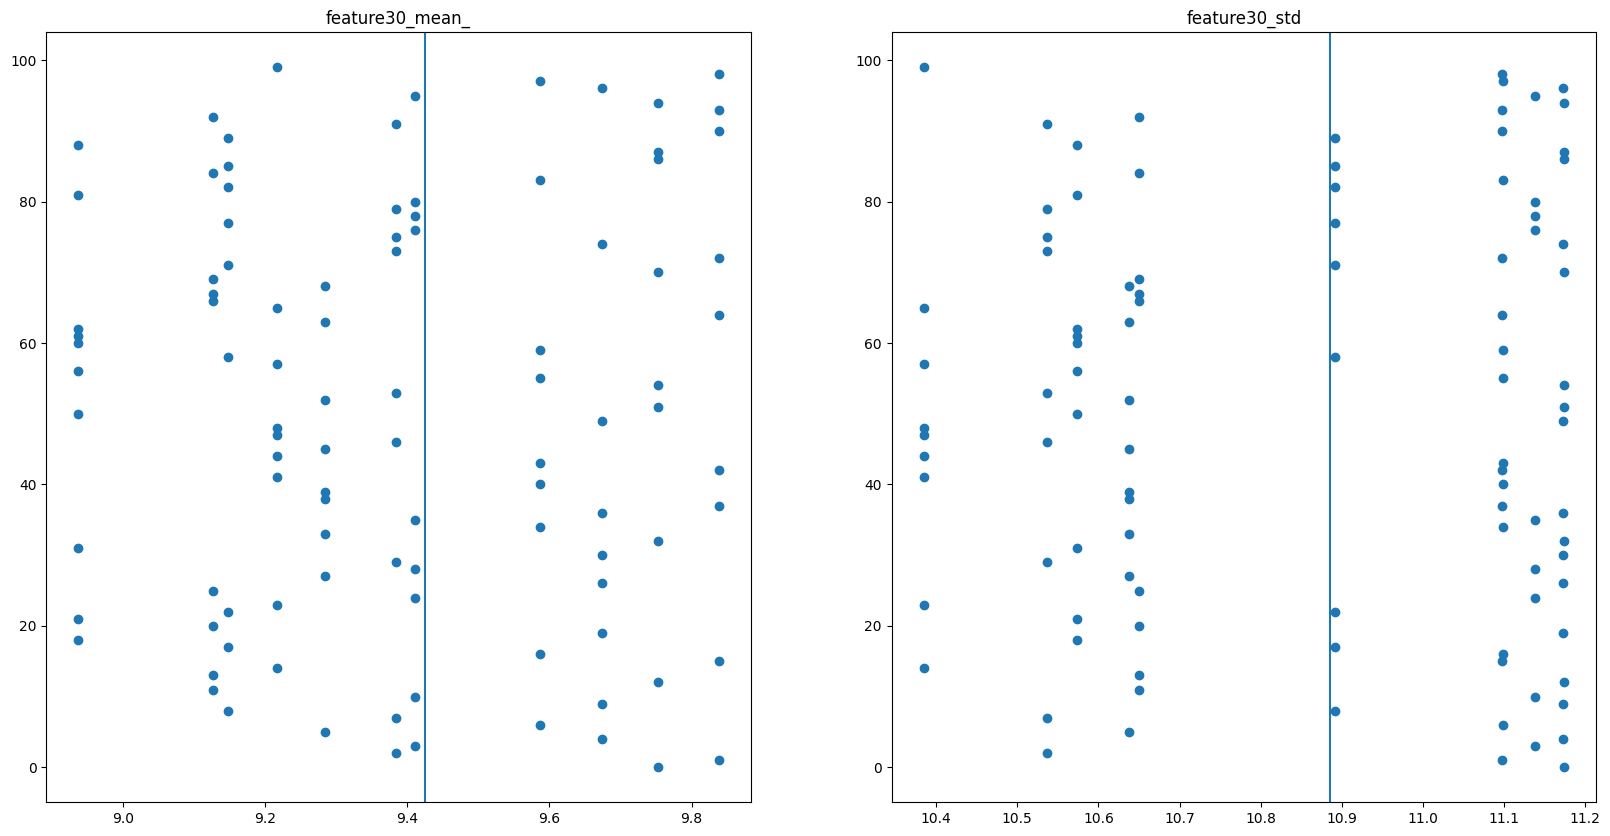

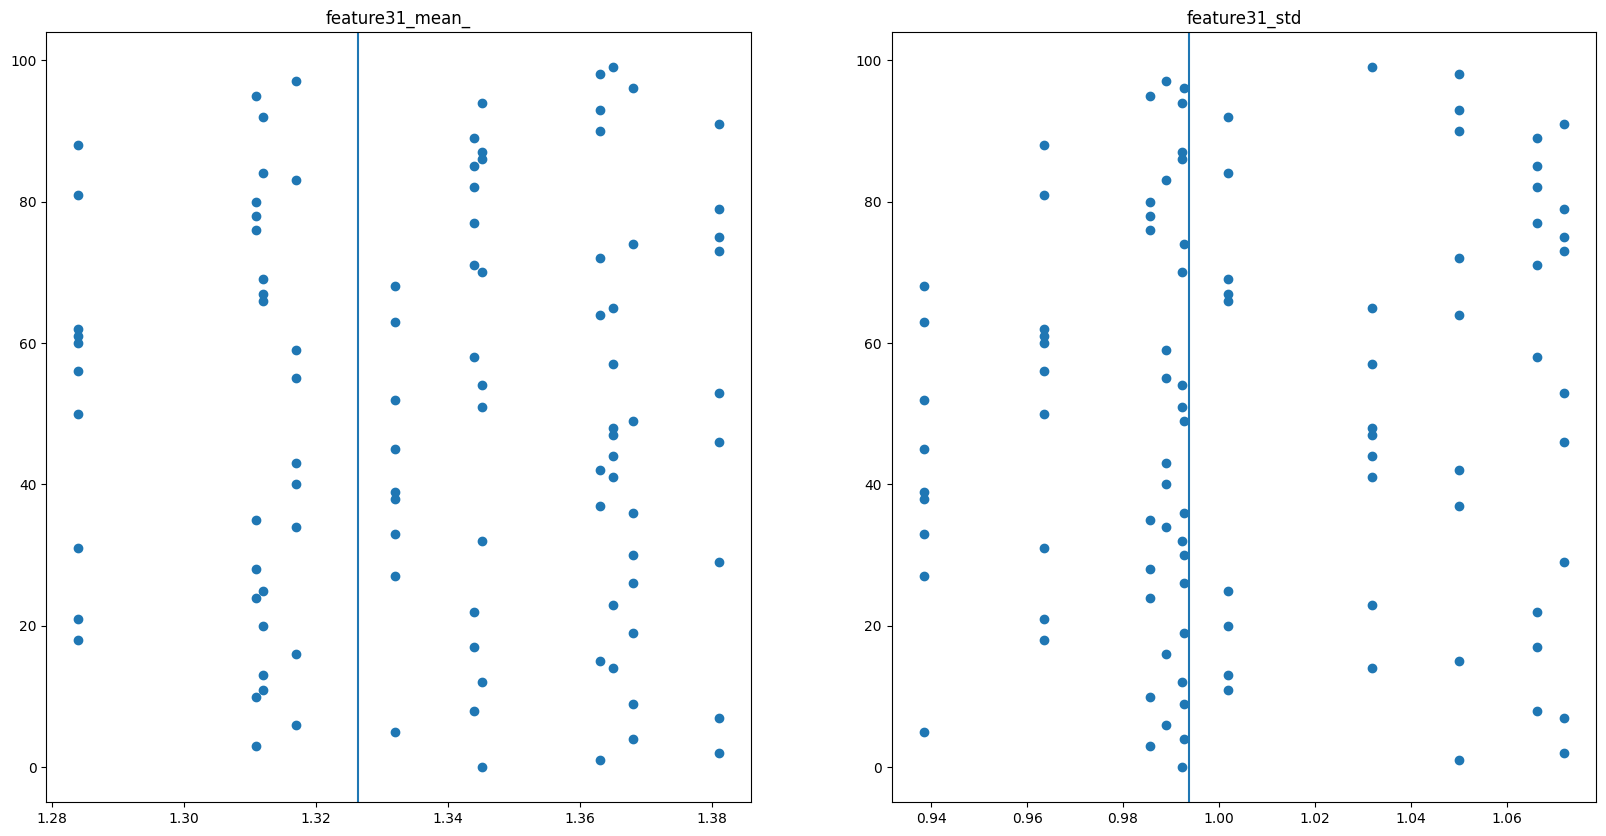

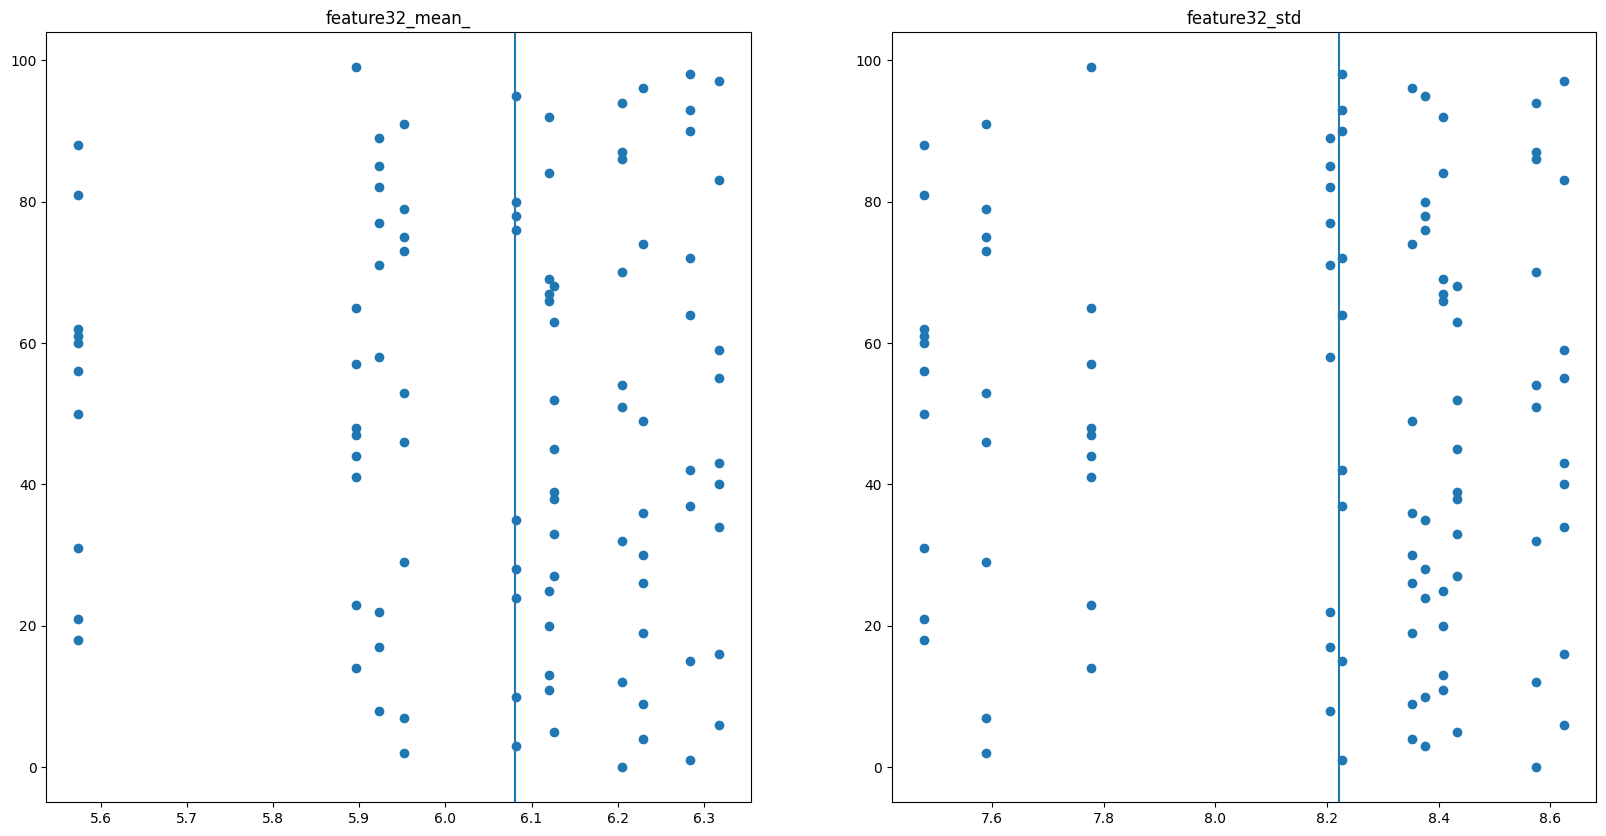

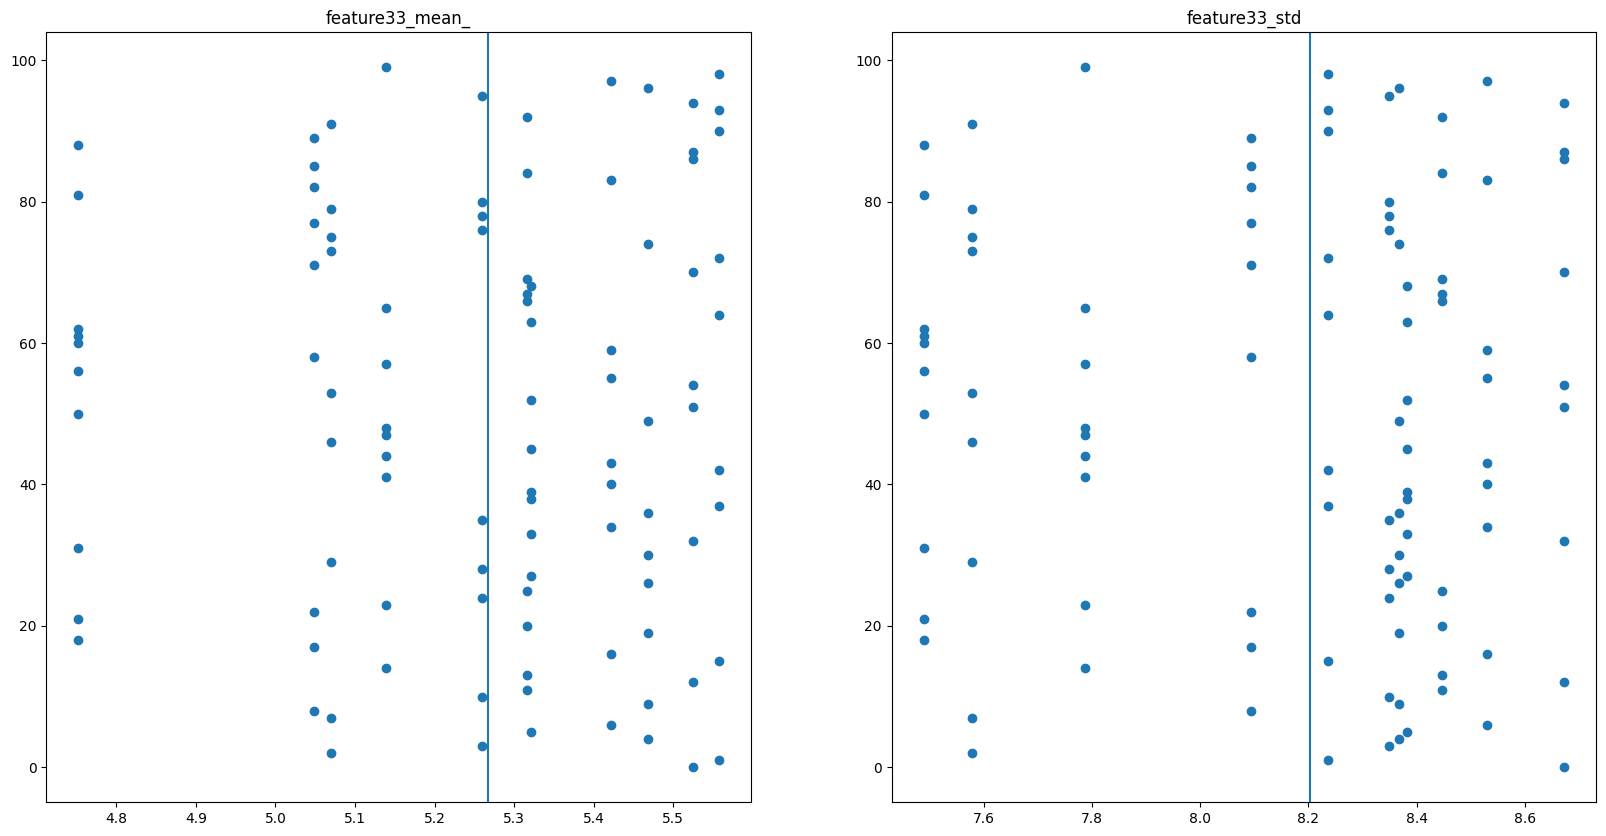

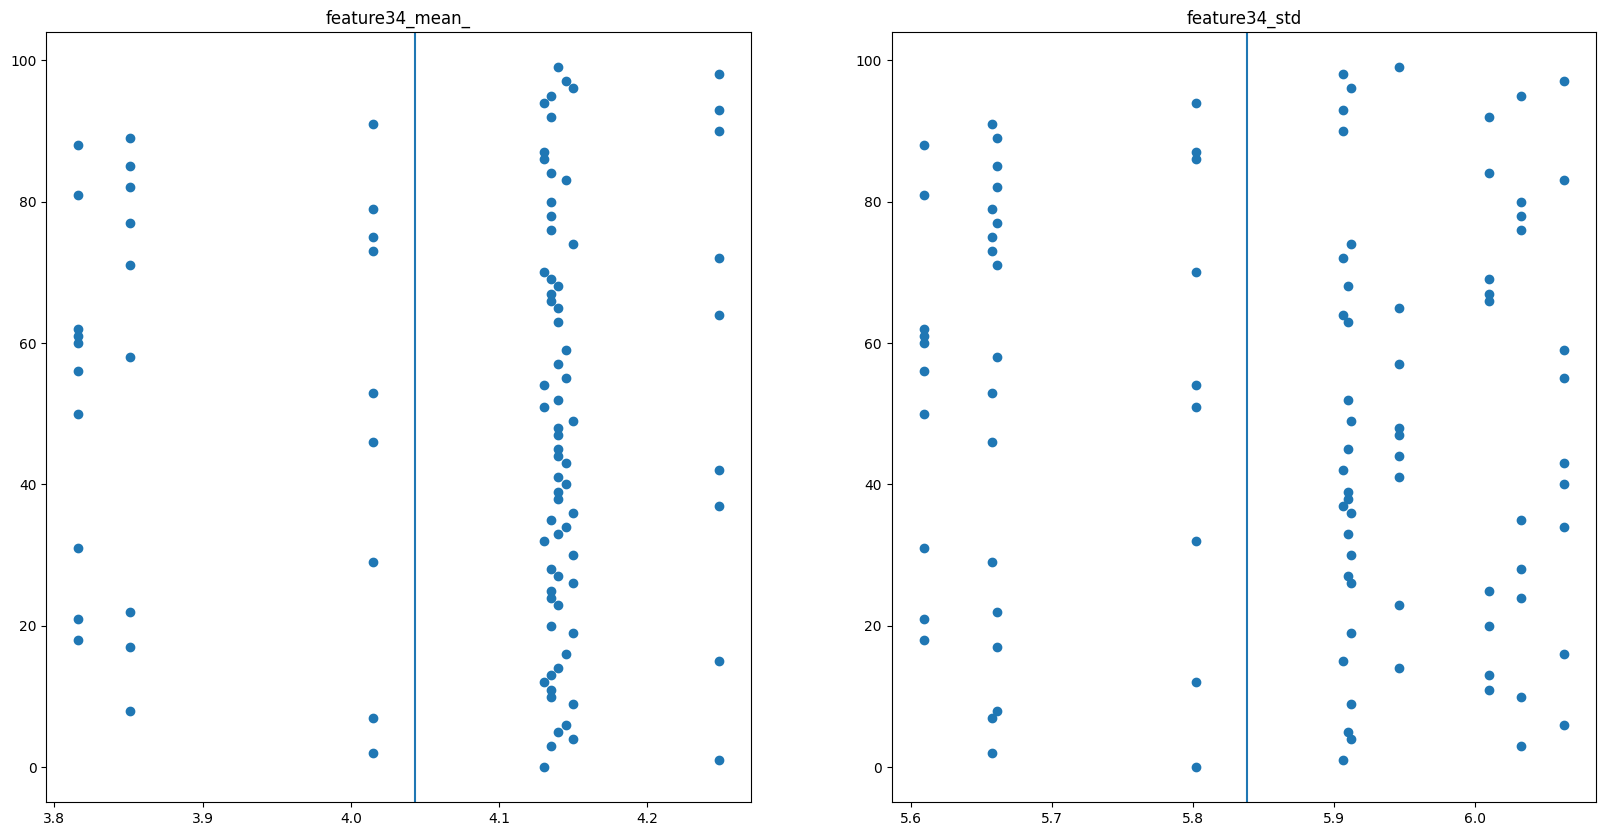

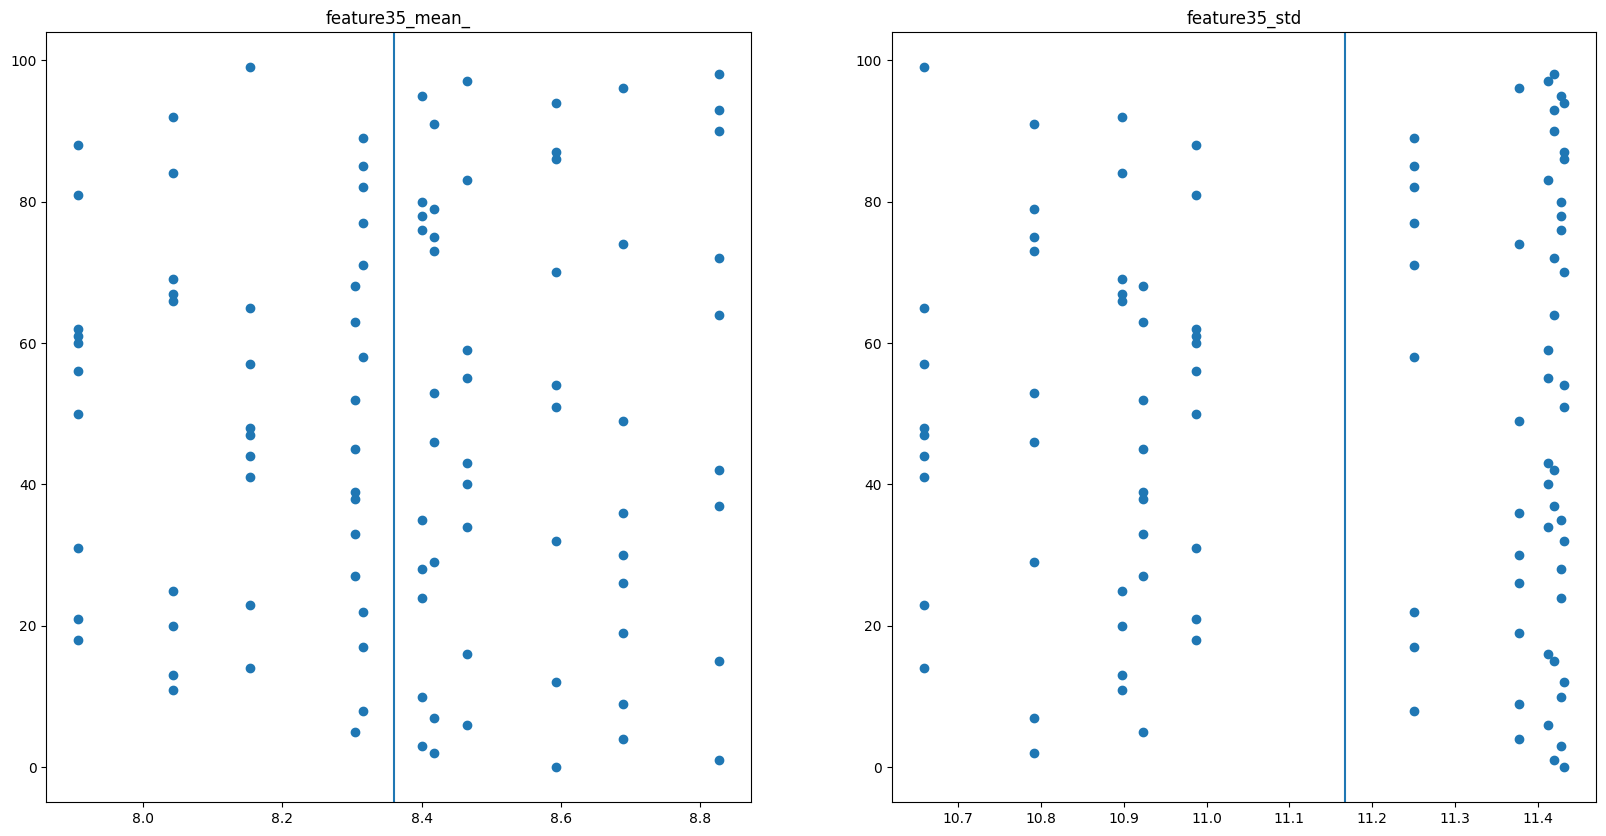

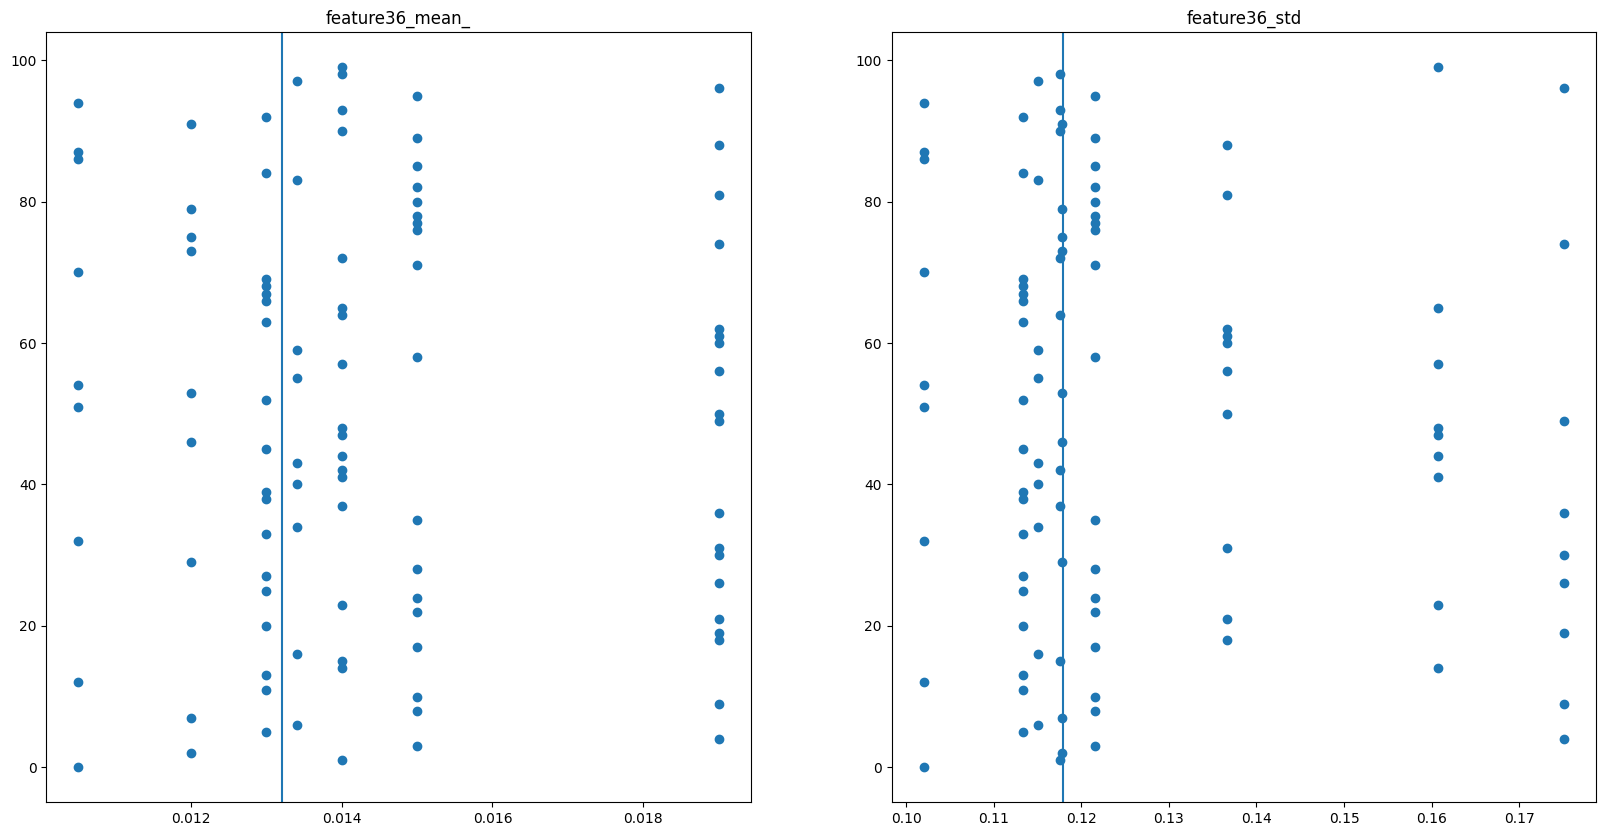

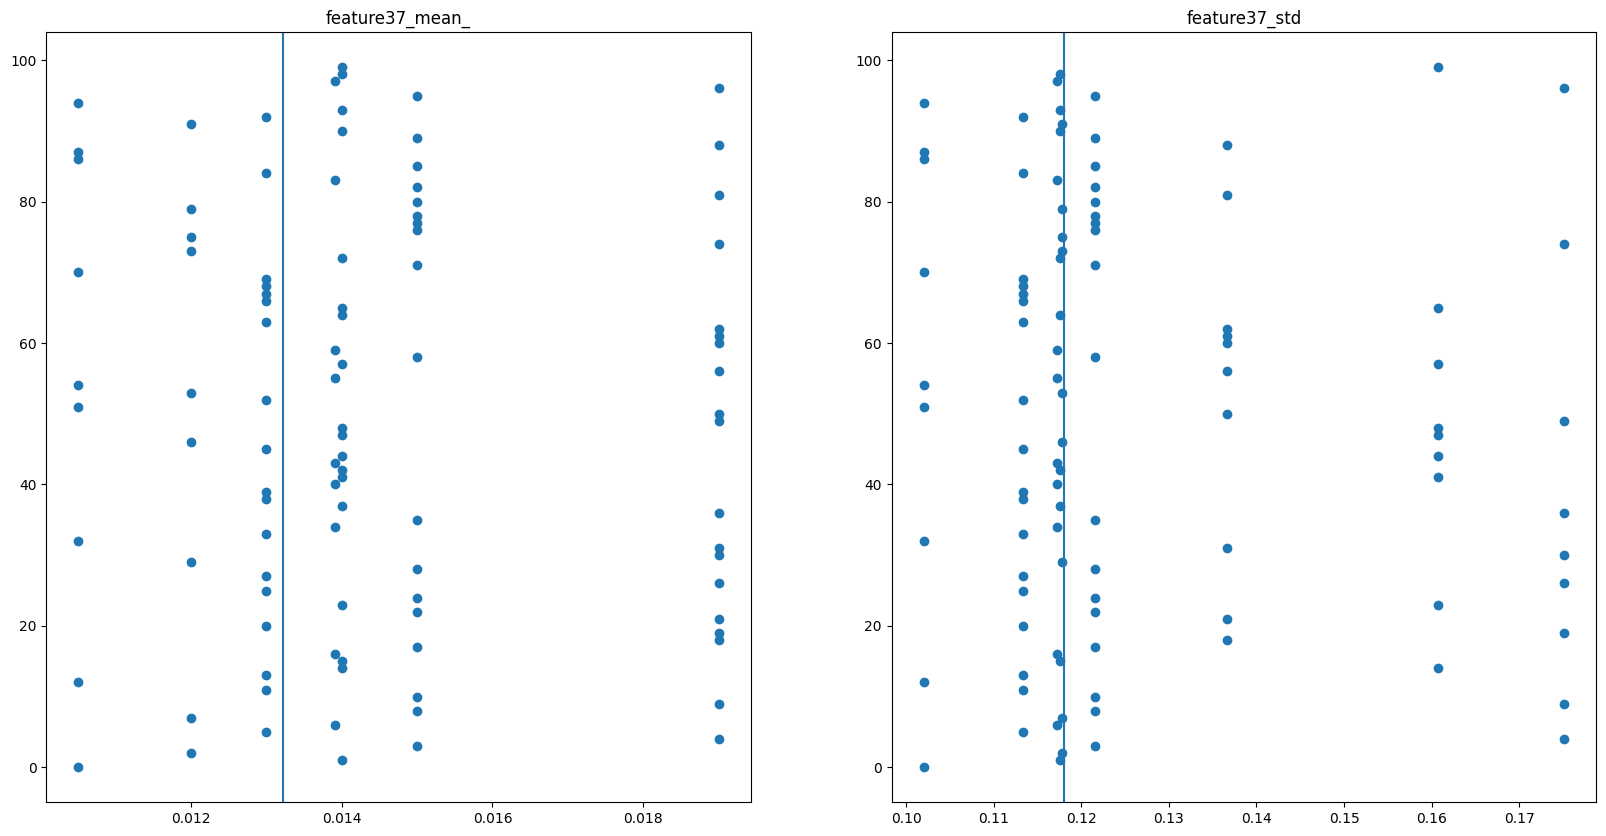

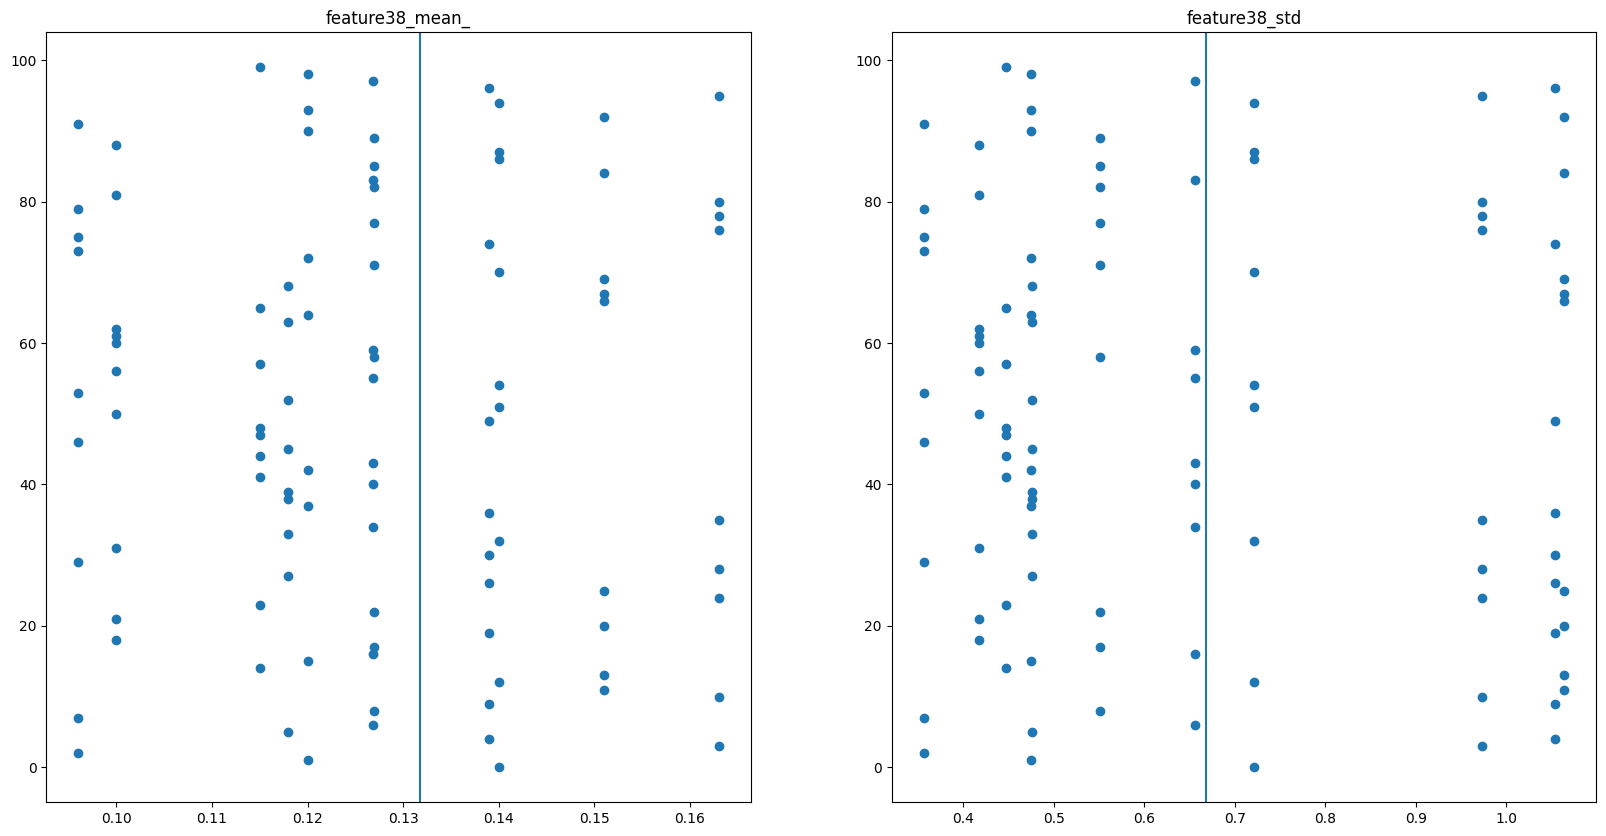

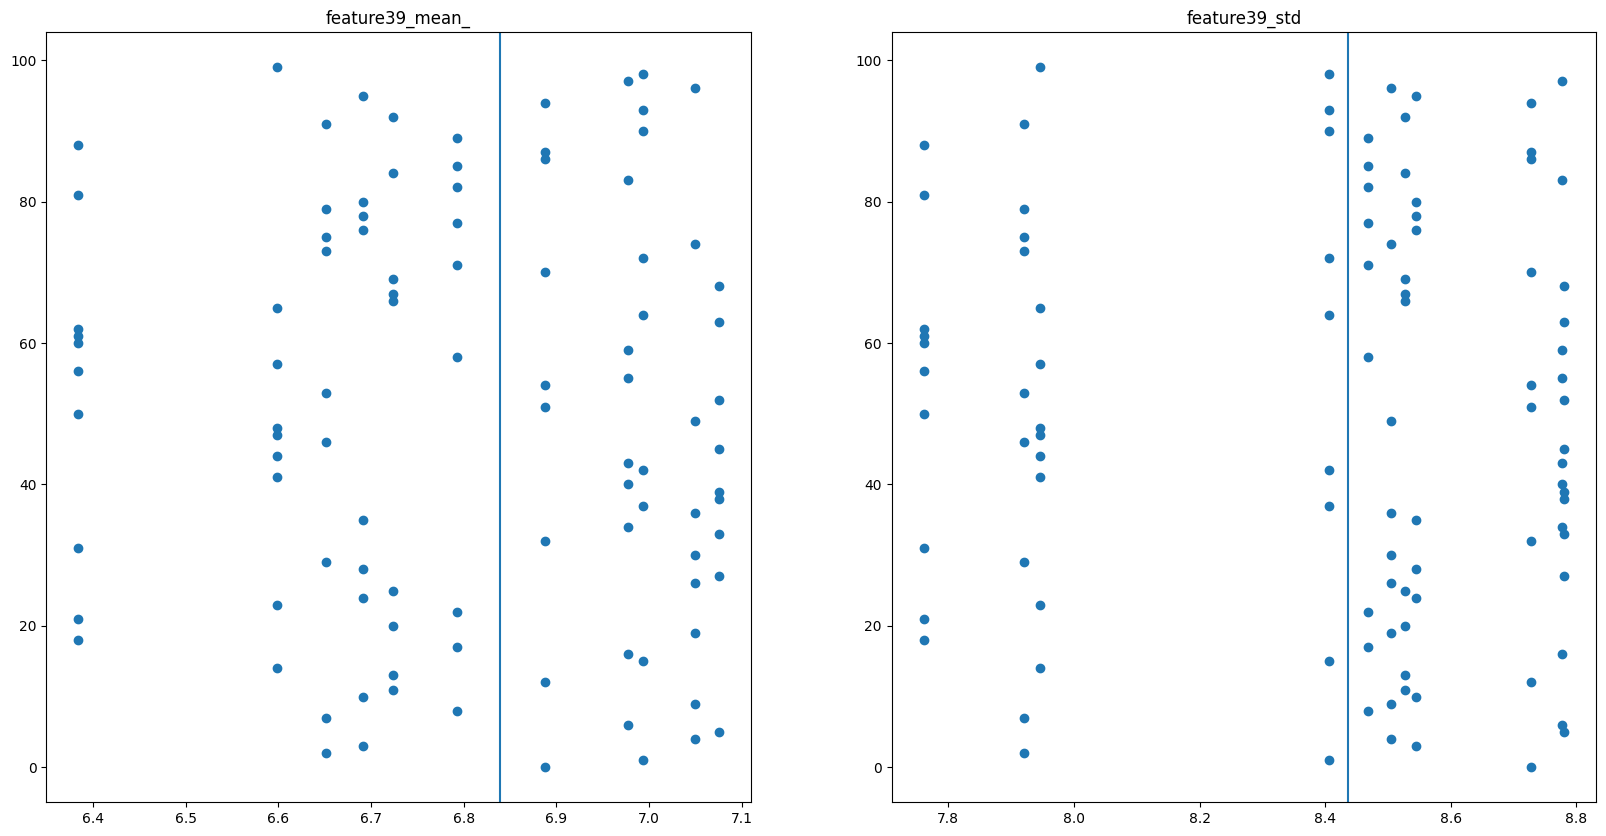

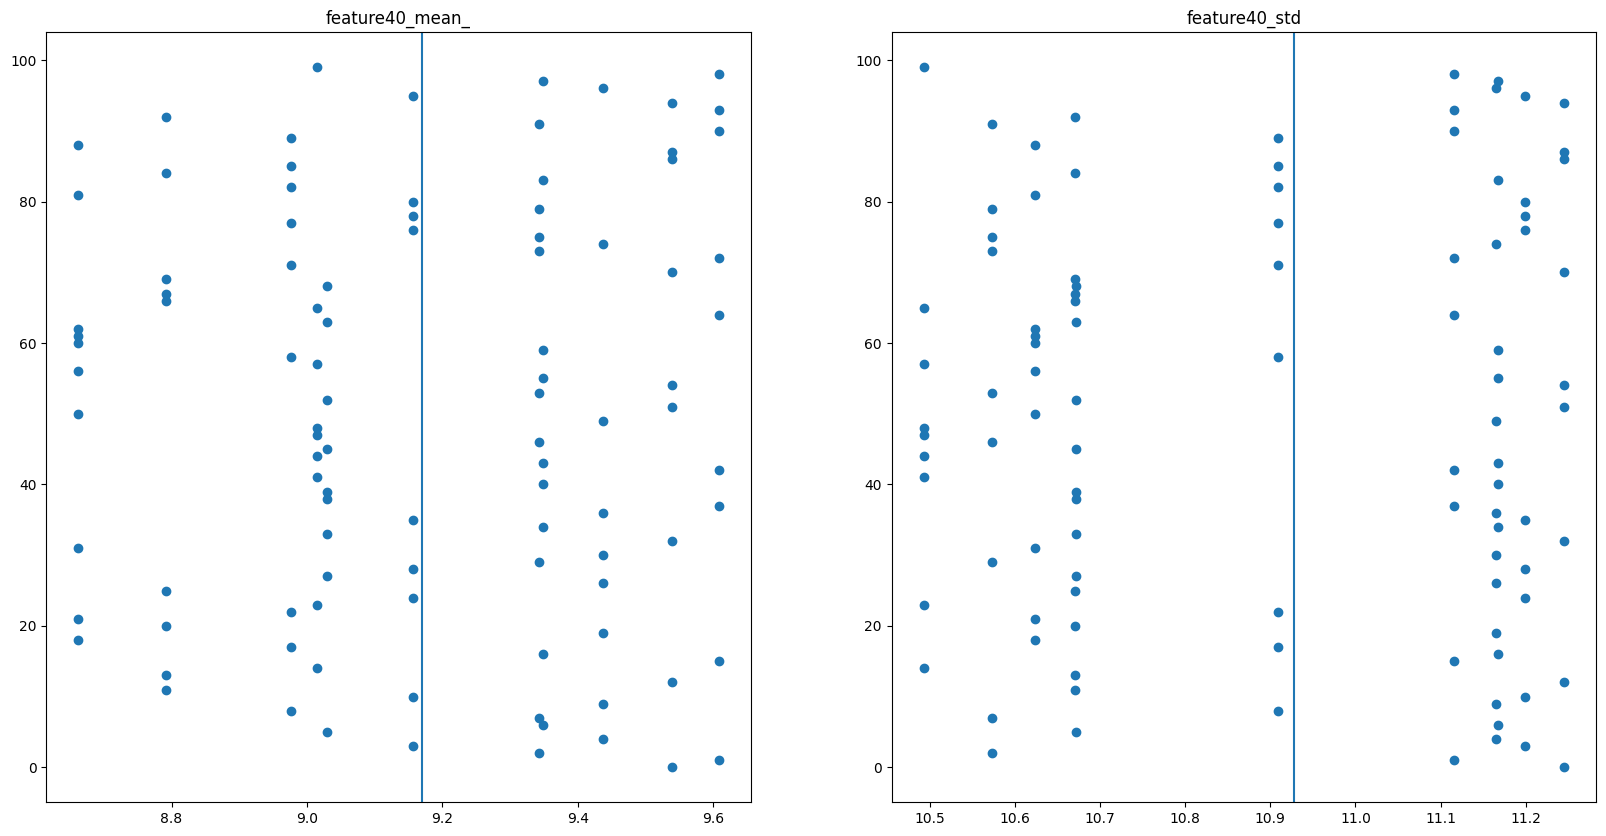

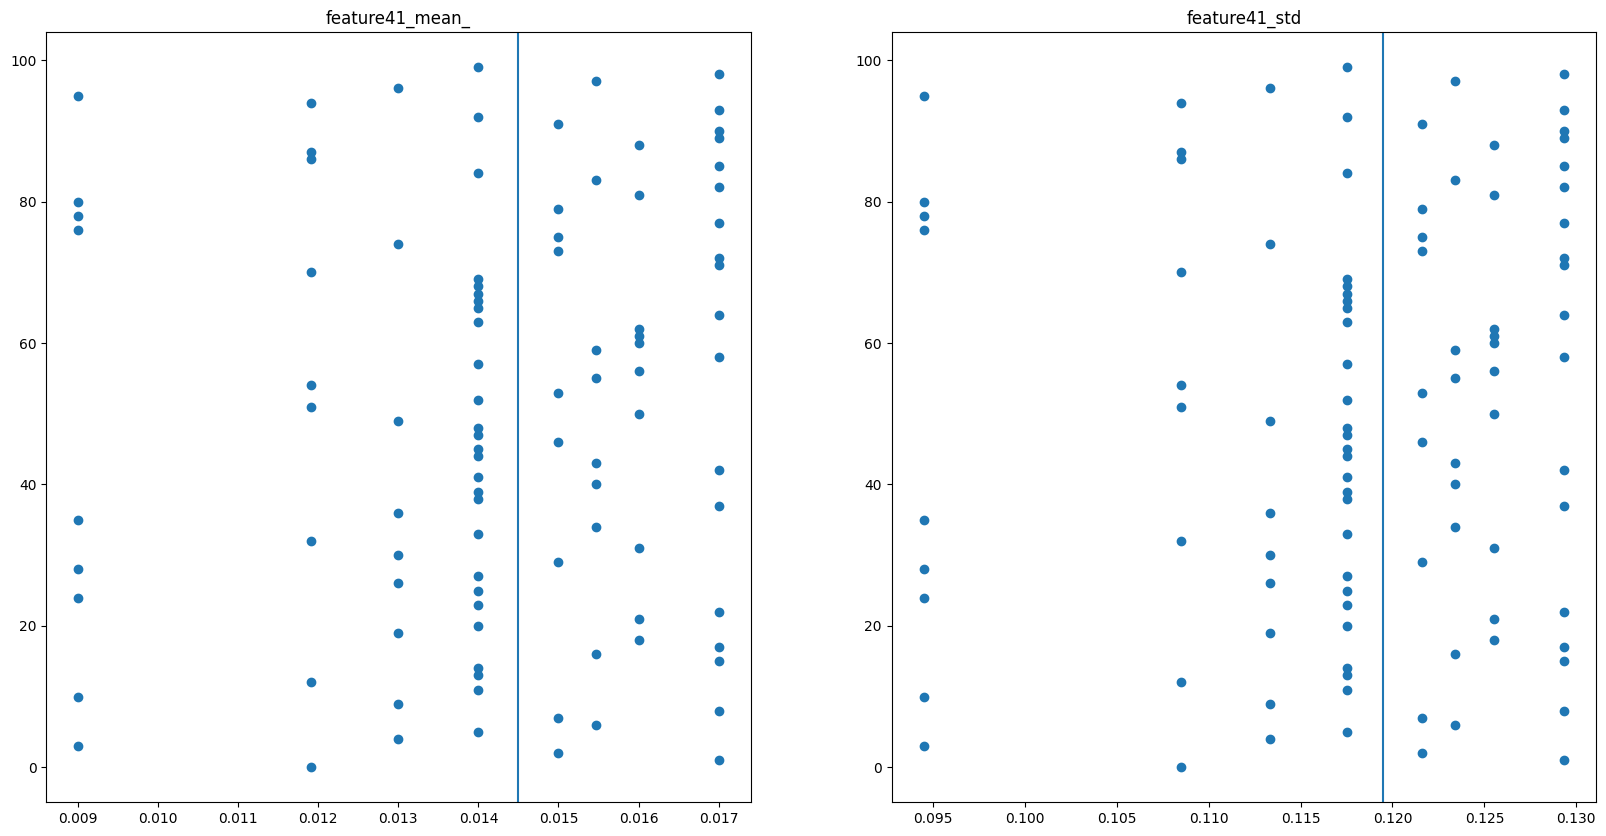

In [19]:
for col in check_drift.keys():
    stats = check_drift[col]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.scatter(x=stats['mean_'],y=stats.index)
    ax1.set_title(f'{col}_mean_')
    ax1.axvline(x=train_df[col].mean())

    ax2.scatter(x=stats['std_'],y=stats.index)
    ax2.set_title(f'{col}_std')
    ax2.axvline(x=train_df[col].std())
    plt.show()

In [25]:
np.array(predictions)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (100,) + inhomogeneous part.

In [28]:
m_p = []
for p in prediction:
    m_p.append(np.mean(p))

In [29]:
import seaborn as sns

<Axes: >

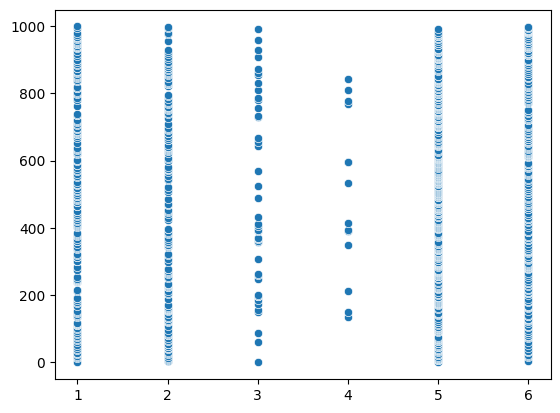

In [30]:
sns.scatterplot(x=m_p, y=list(range(len(m_p))))

In [31]:
m_p

[3.0,
 1.0,
 5.0,
 2.0,
 6.0,
 2.0,
 2.0,
 5.0,
 5.0,
 5.0,
 5.0,
 2.0,
 2.0,
 1.0,
 5.0,
 5.0,
 1.0,
 6.0,
 1.0,
 2.0,
 6.0,
 5.0,
 5.0,
 6.0,
 5.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 6.0,
 5.0,
 2.0,
 5.0,
 6.0,
 6.0,
 5.0,
 5.0,
 1.0,
 2.0,
 1.0,
 5.0,
 2.0,
 2.0,
 6.0,
 1.0,
 5.0,
 5.0,
 2.0,
 2.0,
 5.0,
 1.0,
 5.0,
 6.0,
 2.0,
 2.0,
 2.0,
 5.0,
 5.0,
 5.0,
 1.0,
 6.0,
 3.0,
 5.0,
 2.0,
 5.0,
 5.0,
 2.0,
 1.0,
 1.0,
 5.0,
 5.0,
 2.0,
 5.0,
 6.0,
 5.0,
 1.0,
 6.0,
 1.0,
 6.0,
 6.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 6.0,
 2.0,
 3.0,
 1.0,
 5.0,
 6.0,
 6.0,
 5.0,
 5.0,
 1.0,
 5.0,
 2.0,
 6.0,
 5.0,
 1.0,
 5.0,
 1.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 2.0,
 6.0,
 1.0,
 1.0,
 5.0,
 1.0,
 5.0,
 1.0,
 1.0,
 6.0,
 1.0,
 5.0,
 5.0,
 2.0,
 2.0,
 2.0,
 6.0,
 5.0,
 2.0,
 6.0,
 6.0,
 6.0,
 6.0,
 2.0,
 5.0,
 2.0,
 4.0,
 1.0,
 2.0,
 1.0,
 6.0,
 6.0,
 6.0,
 1.0,
 5.0,
 5.0,
 2.0,
 5.0,
 5.0,
 5.0,
 1.0,
 4.0,
 1.0,
 3.0,
 6.0,
 2.0,
 1.0,
 2.0,
 2.0,
 3.0,
 5.0,
 2.0,
 2.0,
 5.0,
 2.0,
 6.0,
 6.0,
 2.0,
 6.0

In [32]:
from collections import Counter

In [33]:
var_count = Counter(train_df['feature2'])

In [35]:
from src.drift_detector import drift_psi

In [41]:
a = []
for dfx in dfs:
    a.append(drift_psi(var_count, var_test=Counter(dfx['feature2'])))

In [43]:
np.sum(a)

19

In [45]:
import pickle
with open(f'../checkpoints/phase-3/prob-2/varcount_v1.pkl','wb') as file:
    pickle.dump(var_count, file)